In [1]:
import pandas as pd
from scipy.io import arff

# 1.了解数据集

### 1.1观察官方文档

In [2]:
# 读取ARFF文件
file_path = '../DataSet/ObesityDataSet_raw_and_data_sinthetic.arff'
data, meta = arff.loadarff(file_path)

# 将数据转换为pandas DataFrame
df = pd.DataFrame(data)

# 数据集的形状
print("数据集的形状: ")
print(df.shape)

# 显示数据集的前几行
print("数据集的前五行：")
print(df.head())

# 显示数据集的基本信息
print("\n数据集的信息：")
print(df.info())

# 显示数据集的统计描述
print("\n数据集的统计描述：")
print(df.describe().T)

数据集的形状: 
(2111, 17)
数据集的前五行：
      Gender   Age  Height  Weight family_history_with_overweight   FAVC  \
0  b'Female'  21.0    1.62    64.0                         b'yes'  b'no'   
1  b'Female'  21.0    1.52    56.0                         b'yes'  b'no'   
2    b'Male'  23.0    1.80    77.0                         b'yes'  b'no'   
3    b'Male'  27.0    1.80    87.0                          b'no'  b'no'   
4    b'Male'  22.0    1.78    89.8                          b'no'  b'no'   

   FCVC  NCP          CAEC   SMOKE  CH2O     SCC  FAF  TUE           CALC  \
0   2.0  3.0  b'Sometimes'   b'no'   2.0   b'no'  0.0  1.0          b'no'   
1   3.0  3.0  b'Sometimes'  b'yes'   3.0  b'yes'  3.0  0.0   b'Sometimes'   
2   2.0  3.0  b'Sometimes'   b'no'   2.0   b'no'  2.0  1.0  b'Frequently'   
3   3.0  3.0  b'Sometimes'   b'no'   2.0   b'no'  2.0  0.0  b'Frequently'   
4   2.0  1.0  b'Sometimes'   b'no'   2.0   b'no'  0.0  0.0   b'Sometimes'   

                     MTRANS              NObeyesdad

### 1.2验证官方文档

In [3]:
# 定义计算各个指标的函数
def calculate_statistics(column):
    stats = {}
    stats['count'] = column.count()
    stats['mean'] = column.mean()
    stats['std'] = column.std()
    stats['min'] = column.min()
    stats['25%'] = column.quantile(0.25)
    stats['50%'] = column.median()
    stats['75%'] = column.quantile(0.75)
    stats['max'] = column.max()
    return stats

# 计算所有数值列的统计信息
numeric_columns = df.select_dtypes(include=['float64']).columns
manual_stats = {}

for col in numeric_columns:
    manual_stats[col] = calculate_statistics(df[col])

# 转换为DataFrame以便查看
manual_stats_df = pd.DataFrame(manual_stats)

print("手动计算的统计信息：")
print(manual_stats_df.T)

手动计算的统计信息：
         count       mean        std    min        25%        50%         75%  \
Age     2111.0  24.312600   6.345968  14.00  19.947192  22.777890   26.000000   
Height  2111.0   1.701677   0.093305   1.45   1.630000   1.700499    1.768464   
Weight  2111.0  86.586058  26.191172  39.00  65.473343  83.000000  107.430682   
FCVC    2111.0   2.419043   0.533927   1.00   2.000000   2.385502    3.000000   
NCP     2111.0   2.685628   0.778039   1.00   2.658738   3.000000    3.000000   
CH2O    2111.0   2.008011   0.612953   1.00   1.584812   2.000000    2.477420   
FAF     2111.0   1.010298   0.850592   0.00   0.124505   1.000000    1.666678   
TUE     2111.0   0.657866   0.608927   0.00   0.000000   0.625350    1.000000   

           max  
Age      61.00  
Height    1.98  
Weight  173.00  
FCVC      3.00  
NCP       4.00  
CH2O      3.00  
FAF       3.00  
TUE       2.00  


# 2.系统地方案

### 2.1 数据观察和探索性数据分析（EDA）：
对肥胖数据集的探索性数据分析，包括目标变量的分布、数值变量间的相关性以及类别变量对肥胖程度的影响。

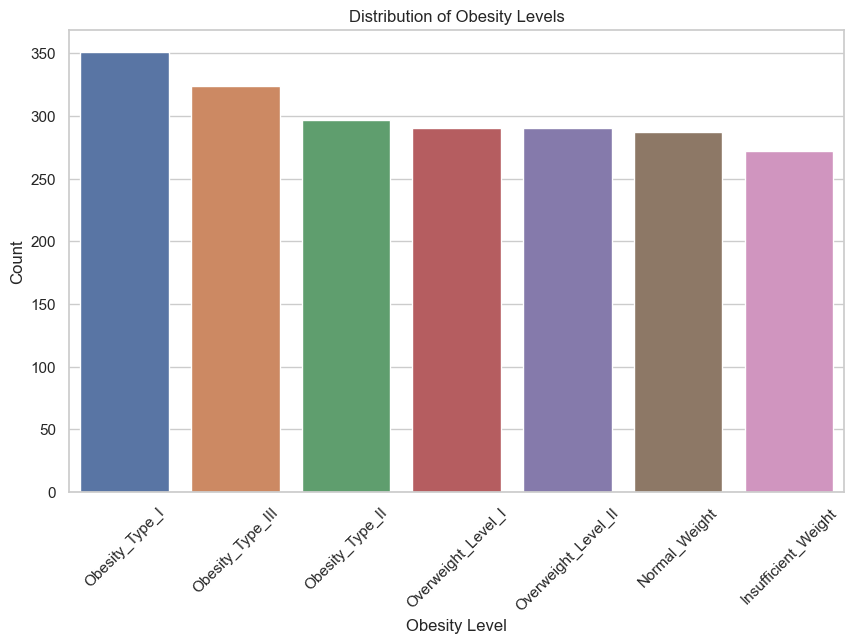

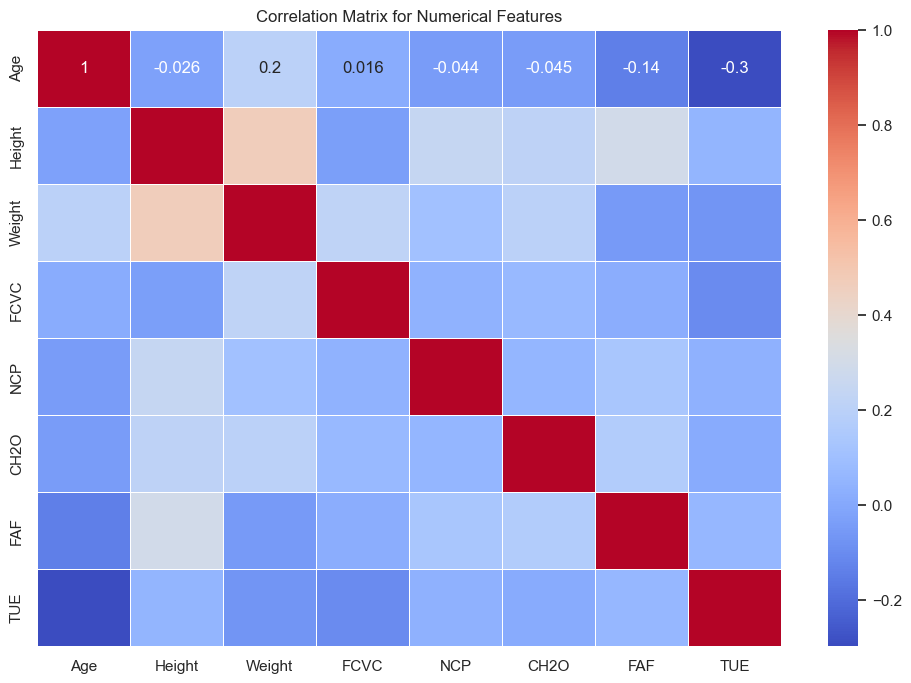

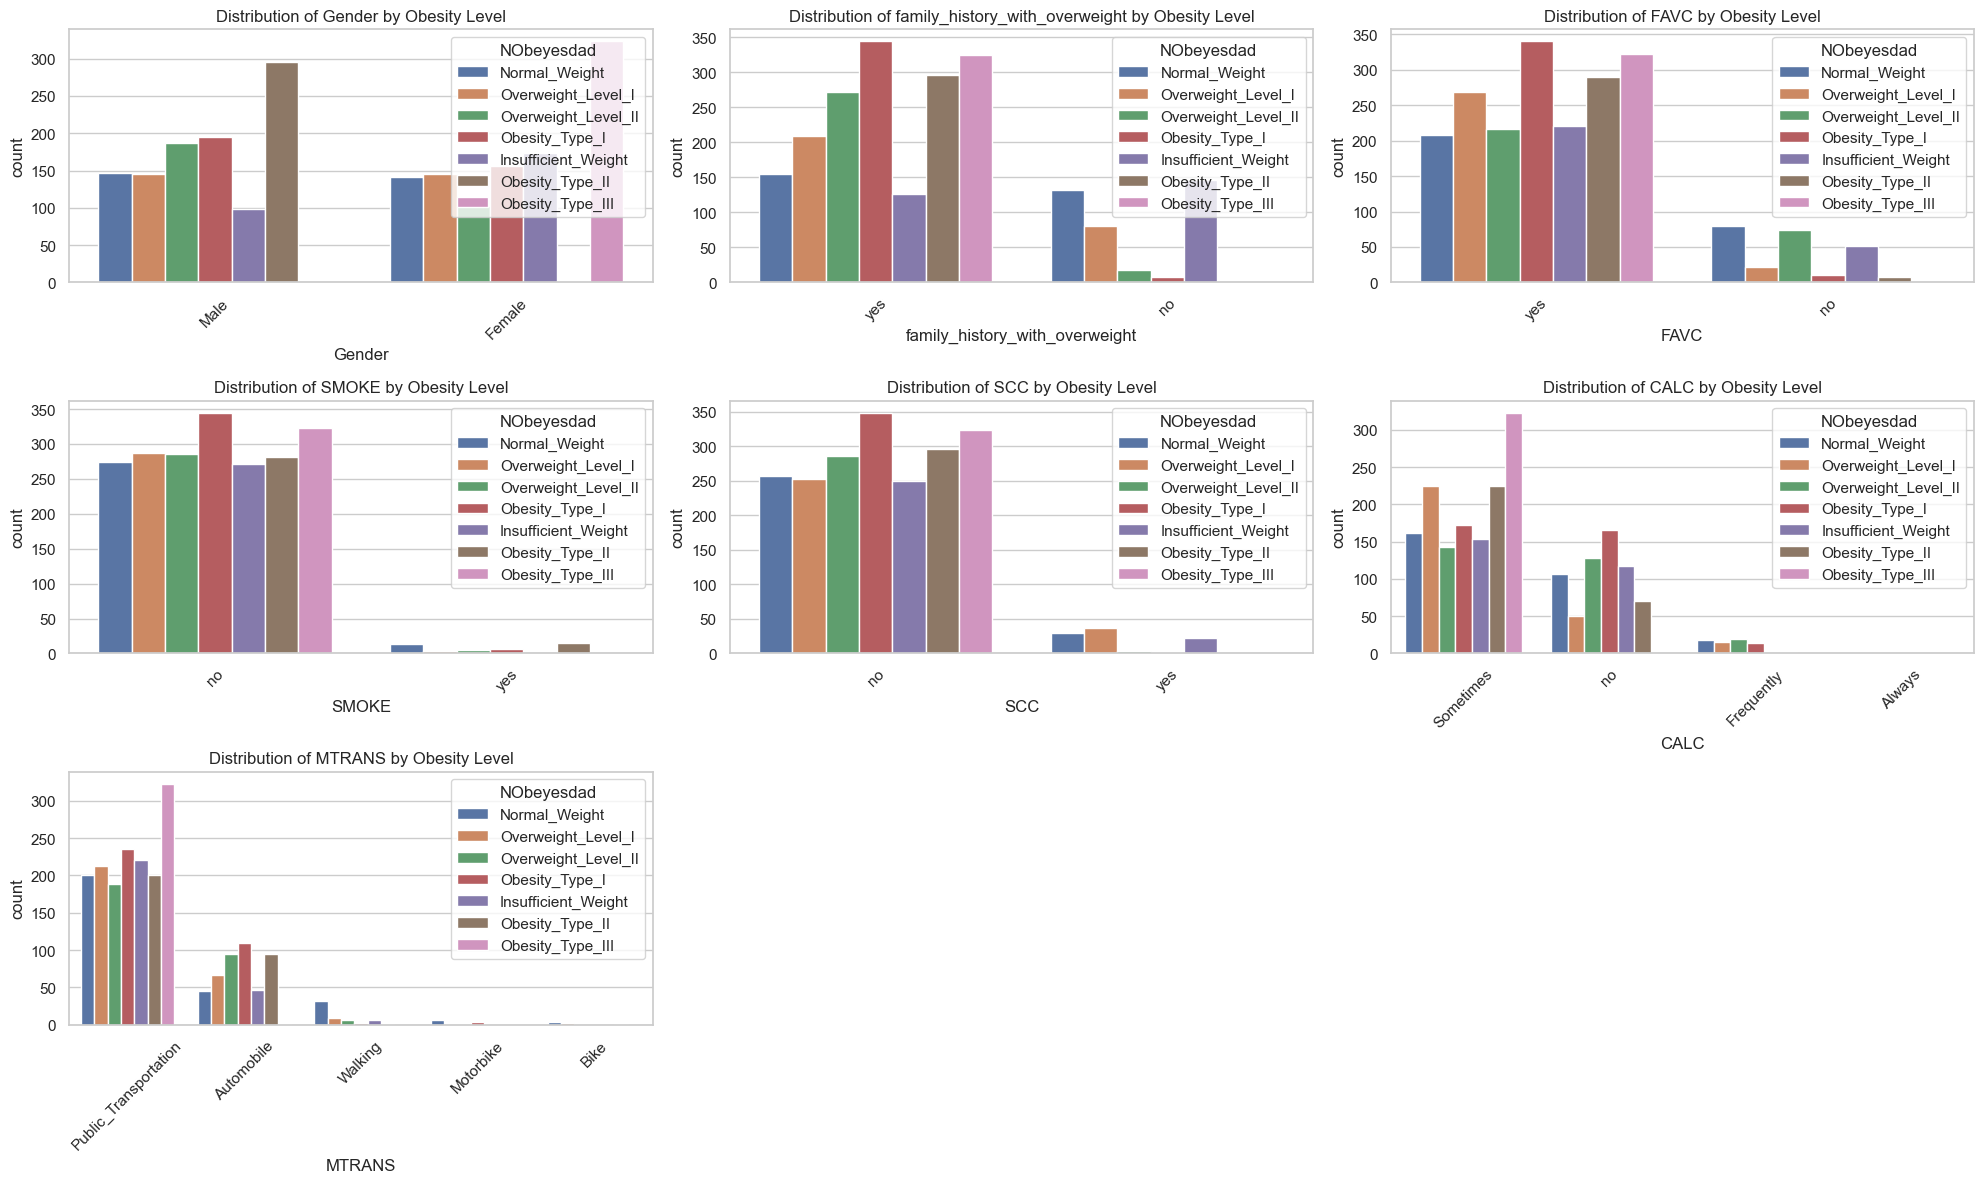

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 将所有分类变量（文本变量）从字节编码转换为字符串。因为 .arff 文件中的字符串数据通常是字节格式的，所以需要解码成 UTF-8 格式以便正确读取和操作。
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].str.decode('utf-8')

# 设置 seaborn 的绘图样式为“whitegrid”，使图表背景为白色网格，方便数据可视化和阅读。
sns.set(style="whitegrid")

# Distribution analysis for the target variable
# 使用 countplot 绘制目标变量 NObeyesdad（肥胖程度）的分布图。
# order 参数按目标变量的类别频率排序，以使图表更具可读性。
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribution of Obesity Levels")
plt.xticks(rotation=45)
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.show()

# Correlation analysis with a heatmap for numerical variables
numerical_features = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_features].corr()

# 数值类别的相关性分析
plt.figure(figsize=(12, 8))
# 提取数据框中的数值变量列（类型为 float64），计算这些变量的相关矩阵。绘制相关矩阵的热力图，以便直观显示数值变量之间的相关性。
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Category variable analysis using count plots
# 种类类型的相关分析
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='NObeyesdad', order=df[col].value_counts().index)
    plt.title(f"Distribution of {col} by Obesity Level")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"""
图标结论:
1.图1: 数据集数量分布相对均匀，每个类别都在300附近 --> 对模型相对友好
2.图2:非线性关系：由于数值变量间相关性不高，可以考虑使用树模型或神经网络等非线性模型来捕捉潜在模式。
在相关性分析中，数值变量之间的相关性较低（如 Weight 与 Age 的相关性仅为 0.2，Height 与 CH2O 的相关性约为 0.2），说明它们之间的线性关系不强。通常情况下，线性模型（如逻辑回归）难以捕捉到这些弱相关变量的复杂关系。
树模型（如随机森林、XGBoost）和神经网络擅长处理非线性关系，能够自动捕捉变量之间的复杂相互作用。它们可以处理多个特征之间的交互效应，适合于具有弱线性关系的变量集合。
3.重要变量：肥胖家族史、高热量食物摄入和交通方式
肥胖家族史（family_history_with_overweight）：在类别分布图中，具有肥胖家族史的人显著多出现在肥胖类别，尤其是“Obesity_Type_I”、“Obesity_Type_II”和“Obesity_Type_III”。这表明肥胖家族史对肥胖有直接影响。
高热量食物摄入（FAVC）：经常摄入高热量食物的人在肥胖级别中的分布较高，特别是在“Obesity_Type_III”。这种分布模式表明高热量食物摄入与肥胖类别之间有一定的关系。
交通方式（MTRANS）：在交通方式与肥胖类别的关系图中，依赖汽车的人多出现在肥胖类别，而步行或公共交通的使用者在正常体重和不足体重类别中的比例更高。这意味着交通方式与日常活动量的关系直接影响肥胖风险。
这些变量在与肥胖类别的关系上展现出明显的差异，因此可以认为它们是重要特征，值得保留用于模型训练。
4.数值型变量：Weight 和 Height 结合 BMI
在相关性矩阵中，Weight 和 Height 之间具有0.46的相关性，说明它们存在一定程度的线性关系。由于 BMI（Body Mass Index）是通过体重和身高计算得到的，BMI是肥胖程度的直接指标，因此使用体重和身高计算BMI作为派生特征能更好地反映肥胖程度。
进一步来看，BMI = Weight / (Height^2)。结合 BMI 作为新的特征，可以帮助捕捉体重和身高对肥胖程度的综合影响。
因此，将体重和身高结合为BMI，能更准确地衡量肥胖程度，适合作为派生特征进行分析。
5.类别变量处理：考虑对类别变量进行One-Hot编码，以便在模型中充分利用这些类别信息。
类别变量处理：One-Hot 编码
在观察类别变量与肥胖等级的分布图时，类别变量（如 Gender、family_history_with_overweight、FAVC、CALC 等）对于目标变量存在显著的区别。为了让模型能够充分利用这些类别信息，我们可以通过 One-Hot 编码将其转换为数值形式，以便于模型识别。
One-Hot 编码可以避免类别之间的顺序性假设（如 Label Encoding），并保留类别之间的独立性。对于涉及多个类别的变量（如 MTRANS），One-Hot 编码能让模型更好地理解其对肥胖类别的贡献。
因此，考虑到类别变量的重要性和多样性，One-Hot 编码能确保模型不会对类别的自然排序产生误解，从而更准确地捕捉不同类别变量对肥胖的影响。
"""

异常值分析：IQR + Z-Score + Modified Z-Score：是一种改进的Z-Score，使用中位数和中位数绝对偏差（MAD）来检测异常值。

箱线图（IQR法）：基于四分位数（IQR）的异常值检测：

适用于大多数变量，如Age和NCP中检测到较多的异常值。<br>
通常适用于非正态分布的数据，但对极端值较为敏感。
IQR法：将异常值替换为上下边界值。

Z-Score：基于标准化的异常值检测。
主要在Age和Weight中检测到少量异常值。
适合正态分布的数据，但对于偏态数据可能不够有效。
Z-Score法：将异常值替换为平均值。

Modified Z-Score法：

在Age和NCP中检测到较多的异常值。
更适合偏态分布的数据，因为使用中位数和MAD进行计算，对极端值更加鲁棒。
Modified Z-Score法：将异常值替换为中位数。

### 2.2 数据预处理：数据编码 + 数据预处理 + 数据分割

### 缺失值处理：数值 -> 平均数 ； 种类 -> 众数

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.io import arff
from sklearn.impute import SimpleImputer

file_path = '../DataSet/ObesityDataSet_raw_and_data_sinthetic.arff'
data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].str.decode('utf-8')

In [6]:
# Handle missing values
# For numerical columns, replace missing values with the mean
num_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['float64']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['float64']))

# For categorical columns, replace missing values with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object', 'category']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object', 'category']))

# Display the result to verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### 异常值处理：将异常值替换为上限或下限值

In [7]:
# Define function to cap outliers based on IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Apply outlier capping for numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns
for col in numerical_columns:
    cap_outliers(df, col)

# Display information to verify outlier handling
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.910277,1.701676,86.584811,2.419043,2.835525,2.008011,1.010298,0.657866
std,5.277434,0.093299,26.187117,0.533927,0.400898,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,2.146845,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,35.079212,1.976160,170.366691,3.000000,3.511893,3.000000,3.000000,2.000000


In [8]:
### 数据类型的转换：

In [9]:
# Calculate BMI and drop Weight and Height columns
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df = df.drop(['Weight', 'Height'], axis=1)

In [10]:
### 热编码

In [11]:
# Encode the target variable
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# One-Hot Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                                         'SMOKE', 'SCC', 'CALC', 'MTRANS'], drop_first=False)

# Display information to verify transformations and encoding
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   FCVC                                2111 non-null   float64
 2   NCP                                 2111 non-null   float64
 3   CH2O                                2111 non-null   float64
 4   FAF                                 2111 non-null   float64
 5   TUE                                 2111 non-null   float64
 6   NObeyesdad                          2111 non-null   int32  
 7   BMI                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   bool   
 9   Gender_Male                         2111 non-null   bool   
 10  family_history_with_overweight_no   2111 non-null   bool   
 11  family_history_with_overweight_yes  2111 no

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.000000,2.0,0.0,1.0,1,24.386526,True,False,...,False,False,False,False,True,False,False,False,True,False
1,21.0,3.0,3.000000,3.0,3.0,0.0,1,24.238227,True,False,...,True,False,False,True,False,False,False,False,True,False
2,23.0,2.0,3.000000,2.0,2.0,1.0,1,23.765432,False,True,...,False,False,True,False,False,False,False,False,True,False
3,27.0,3.0,3.000000,2.0,2.0,0.0,5,26.851852,False,True,...,False,False,True,False,False,False,False,False,False,True
4,22.0,2.0,2.146845,2.0,0.0,0.0,6,28.342381,False,True,...,False,False,False,True,False,False,False,False,True,False


In [12]:
# Prepare features and target for splitting
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

In [13]:
### 不同类型的数据集

In [14]:
# 1. Standard Version (for both Neural Network and Random Forest)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 2. Feature Scaling Version (for Neural Network)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# 3.PCA
from sklearn.decomposition import PCA
# Define number of components for PCA - this can be adjusted based on desired variance
n_components = 10  # for example, reduce to 10 principal components

# Apply PCA on the scaled data (from Version 2)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Split PCA-transformed data into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [17]:
# 4. Binning Version (for Random Forest)
binned_df = df_encoded.copy()
binned_df['Age_bin'] = pd.cut(binned_df['Age'], bins=10, labels=False)  # 10 bins for Age
binned_df['BMI_bin'] = pd.cut(binned_df['BMI'], bins=10, labels=False)  # 10 bins for BMI
binned_df = binned_df.drop(['Age', 'BMI'], axis=1)  # Drop original Age and BMI after binning

X_binned = binned_df.drop('NObeyesdad', axis=1)
y_binned = binned_df['NObeyesdad']
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_split(X_binned, y_binned, test_size=0.2, random_state=42)

In [18]:
# 5. Feature Interaction Version (for both Neural Network and Random Forest)
interaction_df = X.copy()
interaction_df['Age_BMI'] = df['Age'] * df['BMI']  # Example interaction feature between Age and BMI
interaction_df['FCVC_NCP'] = df['FCVC'] * df['NCP']  # Example interaction feature between FCVC and NCP

X_train_inter, X_test_inter, y_train_inter, y_test_inter = train_test_split(interaction_df, y, test_size=0.2, random_state=42)

In [19]:
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (X_train_pca, X_test_pca, y_train_pca, y_test_pca),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

In [20]:
# Output shapes to verify each version, including the new PCA version
(X_train_std.shape, X_test_std.shape, y_train_std.shape, y_test_std.shape,
 X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape,
 X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape,
 X_train_binned.shape, X_test_binned.shape, y_train_binned.shape, y_test_binned.shape,
 X_train_inter.shape, X_test_inter.shape, y_train_inter.shape, y_test_inter.shape)

((1688, 30),
 (423, 30),
 (1688,),
 (423,),
 (1688, 30),
 (423, 30),
 (1688,),
 (423,),
 (1688, 10),
 (423, 10),
 (1688,),
 (423,),
 (1688, 30),
 (423, 30),
 (1688,),
 (423,),
 (1688, 32),
 (423, 32),
 (1688,),
 (423,))

In [21]:
# 模型的训练

In [56]:
import numpy as np
import json
import joblib
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Create ANN model function with dynamic input shape
def create_ann_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning function
def hyperparameter_tuning(X_train, y_train, model_type, num_classes, version):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    X_train = X_train.astype(np.float32)
    y_train = y_train.astype(np.int32)

    if model_type == "RF":
        params = {
            'n_estimators': [50],
            'max_depth': [10],
            'min_samples_split': [2]
        }
        rf_model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(
            rf_model, param_distributions=params, n_iter=1, 
            cv=kf, scoring='accuracy', n_jobs=-1
        )
        random_search_rf.fit(X_train, y_train)
        best_rf_model = random_search_rf.best_estimator_
        best_rf_params = random_search_rf.best_params_
        
        # Save model as PKL
        joblib.dump(best_rf_model, f'RF_best_model_{version}.pkl')

        return best_rf_model, best_rf_params

    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        input_shape = X_train.shape[1]
        best_score = 0
        best_params = None

        param_grid = {
            'neurons': [16],
            'layers': [2],
            'epochs': [50],
            'batch_size': [20]
        }

        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_idx, test_idx in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
                            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

                            model = create_ann_model(neurons, layers, input_shape, num_classes)
                            model.fit(
                                X_train_fold, y_train_fold, 
                                epochs=epochs, batch_size=batch_size, verbose=0
                            )
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)

                        mean_score = np.mean(scores)
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {
                                'neurons': neurons, 
                                'layers': layers, 
                                'epochs': epochs, 
                                'batch_size': batch_size
                            }

        best_ann_model = create_ann_model(best_params['neurons'], best_params['layers'], input_shape, num_classes)
        best_ann_model.fit(X_train, y_train, 
                           epochs=best_params['epochs'], 
                           batch_size=best_params['batch_size'], 
                           verbose=0)
        
        # Save model as H5
        best_ann_model.save(f'ANN_best_model_{version}.h5')

        return best_ann_model, best_params

    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

# Define datasets as numpy arrays
datasets = {
    'standard': (X_train_std.values.astype(np.float32), X_test_std.values.astype(np.float32), y_train_std.values, y_test_std.values),
    'scaled': (X_train_scaled.astype(np.float32), X_test_scaled.astype(np.float32), y_train_scaled, y_test_scaled),
    'pca': (X_train_pca.astype(np.float32), X_test_pca.astype(np.float32), y_train_pca, y_test_pca),
    'binned': (X_train_binned.values.astype(np.float32), X_test_binned.values.astype(np.float32), y_train_binned.values, y_test_binned.values),
    'interaction': (X_train_inter.values.astype(np.float32), X_test_inter.values.astype(np.float32), y_train_inter.values, y_test_inter.values)
}

# Train models for each dataset
results = {}
num_classes = len(np.unique(y))

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    result = {'version': version}
    
    if version in ['standard', 'binned']:
        best_rf, best_rf_params = hyperparameter_tuning(X_train, y_train, "RF", num_classes, version)
        rf_accuracy = best_rf.score(X_test, y_test)
        result['RF'] = {'accuracy': rf_accuracy, 'params': best_rf_params}
    
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_ann_params = hyperparameter_tuning(X_train, y_train, "ANN", num_classes, version)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        ann_accuracy = best_ann.evaluate(X_test, y_test_cat, verbose=0)[1]
        result['ANN'] = {'accuracy': ann_accuracy, 'params': best_ann_params}
    
    results[version] = result

# Save results to JSON (without model objects)
serializable_results = {}
for version, result in results.items():
    serializable_results[version] = {}
    for model_type, metrics in result.items():
        if isinstance(metrics, dict):
            serializable_results[version][model_type] = {
                'accuracy': metrics['accuracy'],
                'params': metrics['params']
            }

with open('model_results.json', 'w') as f:
    json.dump(serializable_results, f)

# Display results
serializable_results


{'standard': {'RF': {'accuracy': 0.966903073286052,
   'params': {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}}},
 'scaled': {'ANN': {'accuracy': 0.9219858050346375,
   'params': {'neurons': 16, 'layers': 2, 'epochs': 50, 'batch_size': 20}}},
 'pca': {'ANN': {'accuracy': 0.7470449209213257,
   'params': {'neurons': 16, 'layers': 2, 'epochs': 50, 'batch_size': 20}}},
 'binned': {'RF': {'accuracy': 0.8865248226950354,
   'params': {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}}},
 'interaction': {'ANN': {'accuracy': 0.8747044801712036,
   'params': {'neurons': 16, 'layers': 2, 'epochs': 50, 'batch_size': 20}}}}

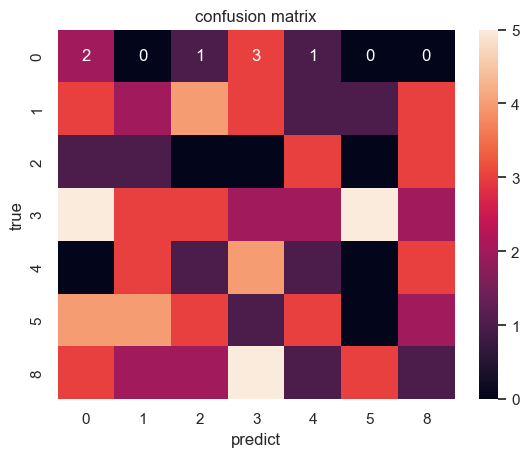

In [71]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

y_test = np.random.randint(1,8,100)
y_pred = np.random.randint(1,8,100)


fig = plt.figure()
ax = fig.add_subplot(111)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,annot=True,xticklabels=['0','1','2','3','4','5','8'],yticklabels=['0','1','2','3','4','5','8']) #画热力图
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
plt.show()



Evaluating Dataset: standard
RF Model (standard) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (standard) Evaluation Results:
Accuracy: 0.9669
Precision: 0.9673
Recall: 0.9669
F1 Score: 0.9669
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 1 58  0  0  0  2  1]
 [ 0  0 77  1  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  0  0  0  0  1 49]]


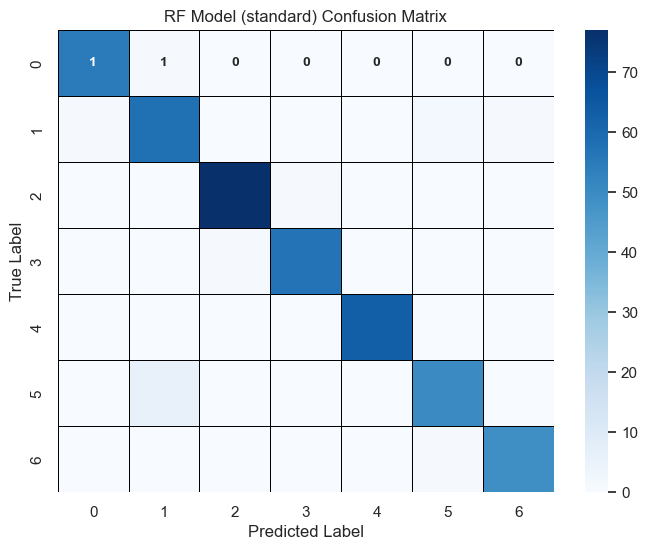

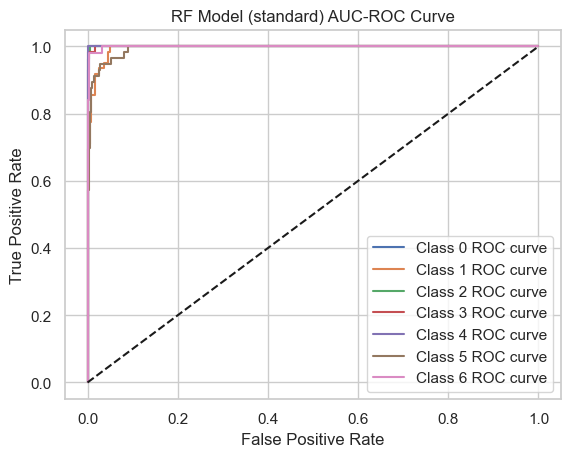


Evaluating Dataset: scaled
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020883622170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020883622170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.exper

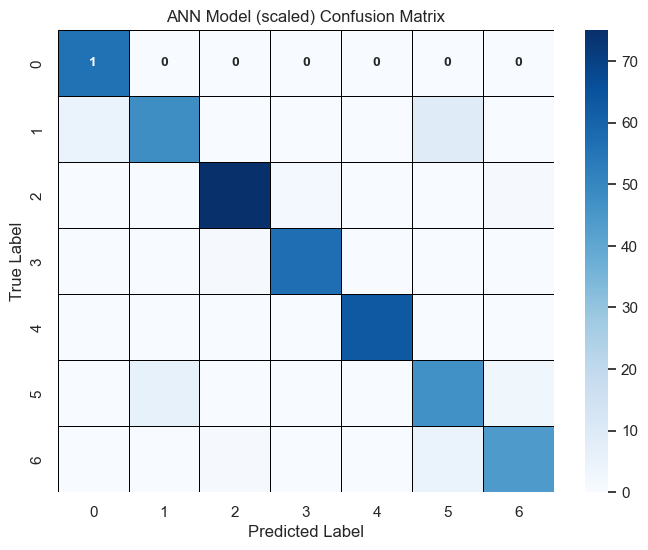

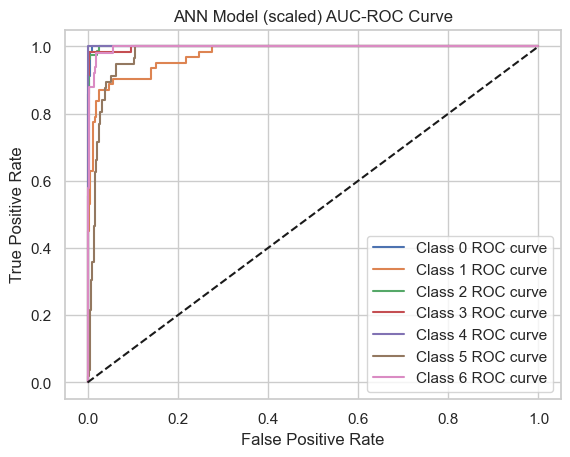


Evaluating Dataset: pca
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A6CDB40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A6CDB40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experime

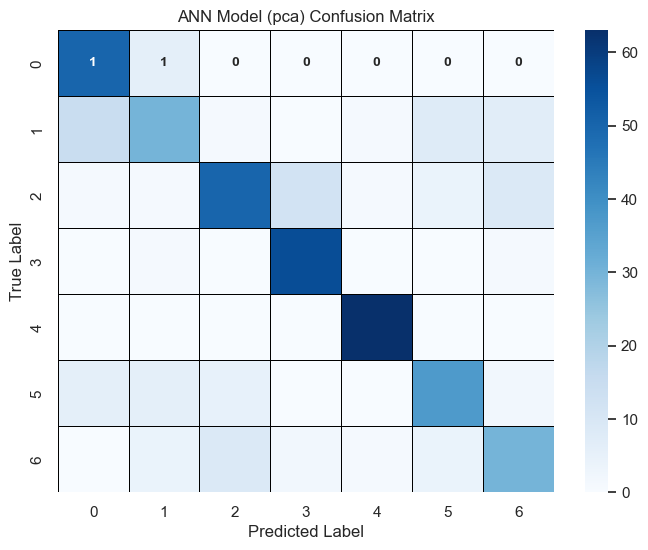

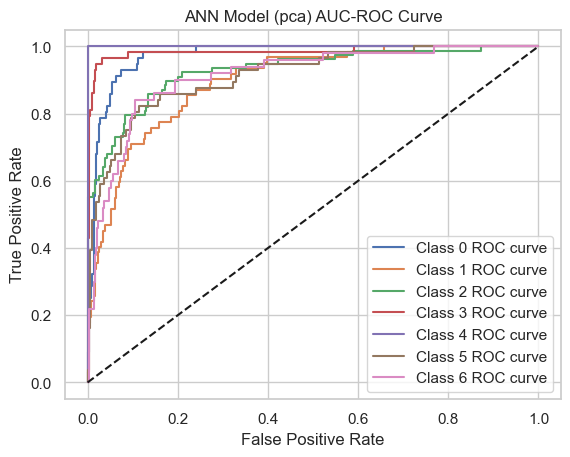


Evaluating Dataset: binned
RF Model (binned) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (binned) Evaluation Results:
Accuracy: 0.8865
Precision: 0.8855
Recall: 0.8865
F1 Score: 0.8855
Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 7 50  0  0  0  3  2]
 [ 0  1 68  4  0  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 45  4]
 [ 0  0  7  0  0  5 38]]


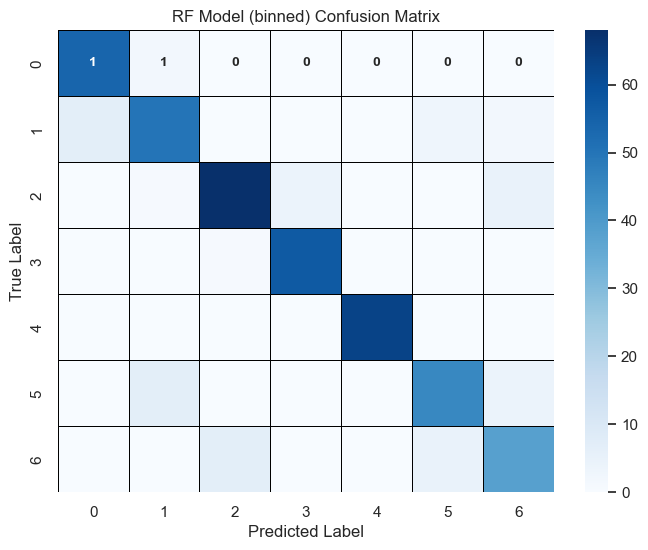

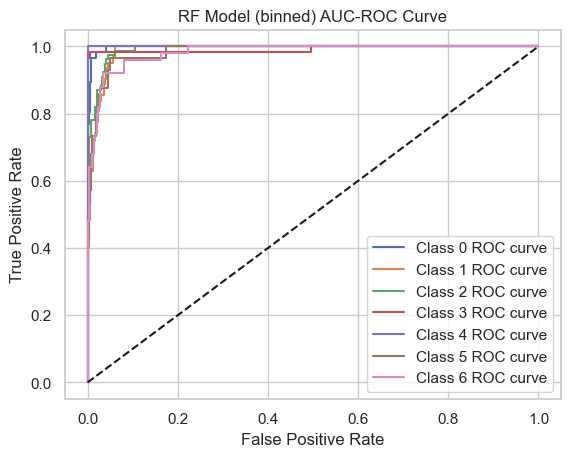


Evaluating Dataset: interaction
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020894417250>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020894417250>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.

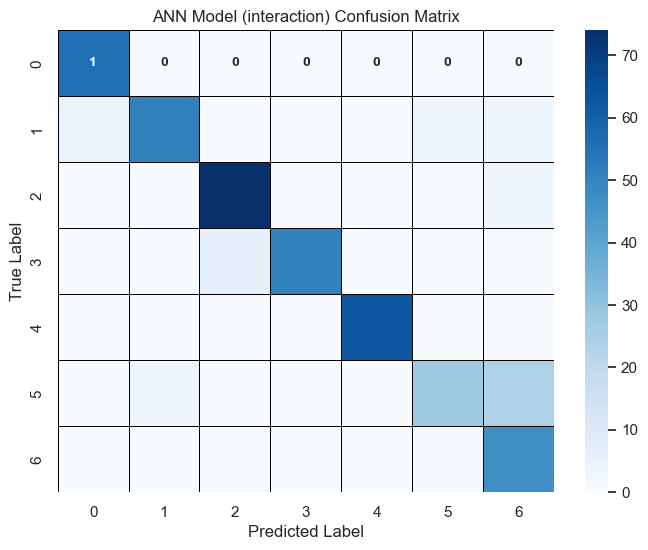

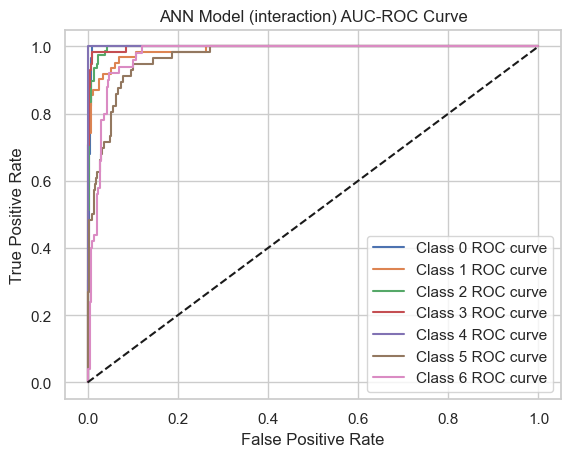

In [67]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    
    # Annotate only non-zero values
    mask = conf_matrix > 0
    sns.heatmap(conf_matrix, annot=mask, fmt='d', cmap='Blues', cbar=True, 
                annot_kws={"weight": "bold", "fontsize": 10}, linewidths=0.5, linecolor='black')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Suppress AutoGraph warnings globally
@tf.autograph.experimental.do_not_convert
def model_predict(model, data):
    return model.predict(data)

# Define evaluation function
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name, best_params):
    # Output best model parameters
    print(f"{model_name} Best Parameters: {best_params}")
    
    # Calculate accuracy, precision, recall, F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Print evaluation results
    print(f"{model_name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix as a heatmap
    plot_confusion_matrix(conf_matrix, title=f'{model_name} Confusion Matrix')

    # AUC-ROC curve
    if num_classes > 2:  # Multiclass case
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc = roc_auc_score(y_true_bin, y_proba, average='weighted', multi_class='ovr')

        # Plot multiclass ROC curve
        fpr = dict()
        tpr = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])

        plt.figure()
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
    else:  # Binary case
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Load results file
with open('model_results.json', 'r') as f:
    results = json.load(f)

# Load and evaluate the best model for each dataset
for version, result in results.items():
    print(f"\nEvaluating Dataset: {version}")

    X_test = None
    y_test = None

    # Select the corresponding test set based on the version
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    # Ensure X_test is a NumPy array with the correct dtype
    X_test = np.array(X_test, dtype=np.float32)
    num_classes = len(np.unique(y_test))

    # Evaluate Random Forest model
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        best_rf_params = result['RF']['params']
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF Model ({version})', best_rf_params)

    # Evaluate ANN model
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')

        best_ann_params = result['ANN']['params']
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = model_predict(best_ann_model, X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN Model ({version})', best_ann_params)



Evaluating Dataset: standard
RF Model (standard) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (standard) Evaluation Results:
Accuracy: 0.9669
Precision: 0.9673
Recall: 0.9669
F1 Score: 0.9669
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 1 58  0  0  0  2  1]
 [ 0  0 77  1  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  0  0  0  0  1 49]]


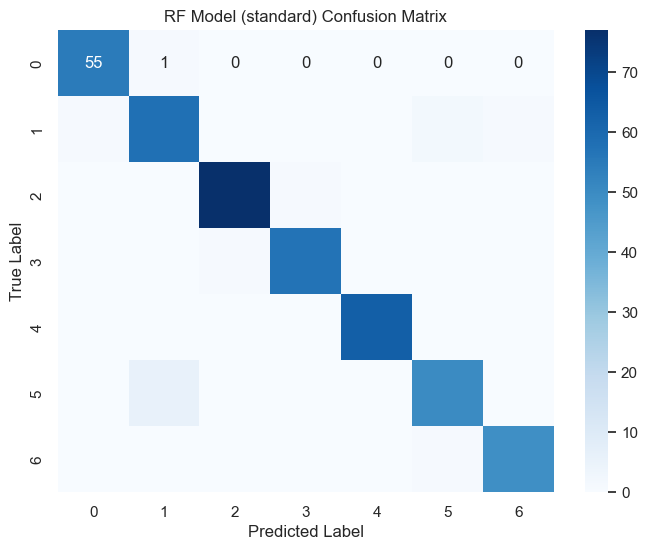

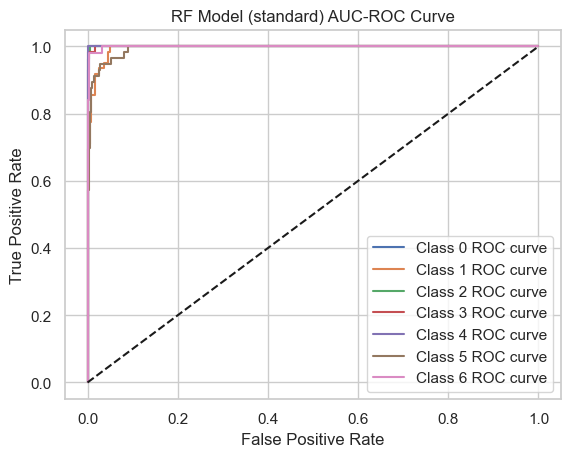


Evaluating Dataset: scaled
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020883616950>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020883616950>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.exper

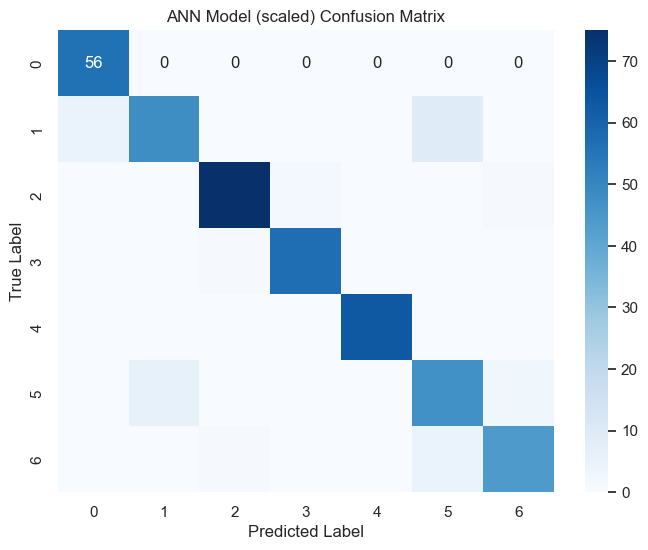

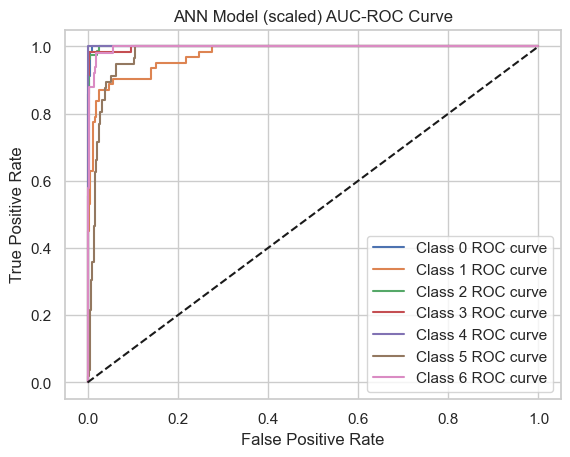


Evaluating Dataset: pca
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208860D1E10>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208860D1E10>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experime

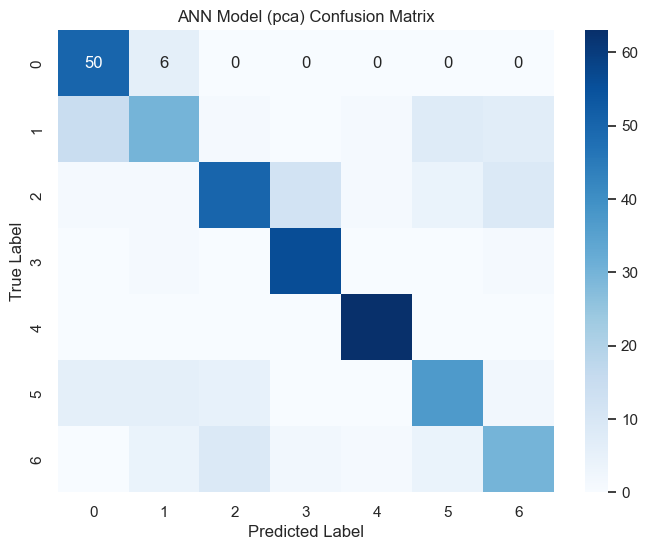

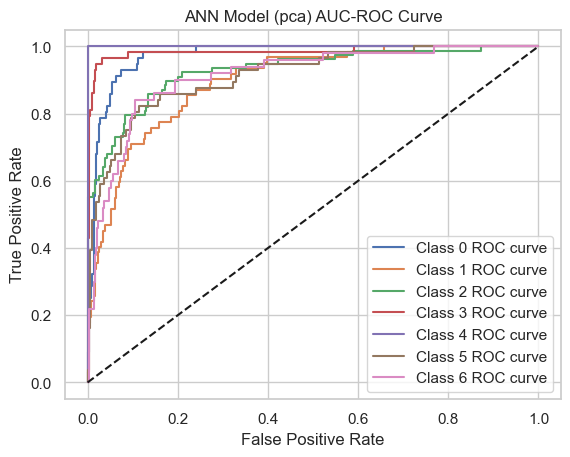


Evaluating Dataset: binned
RF Model (binned) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (binned) Evaluation Results:
Accuracy: 0.8865
Precision: 0.8855
Recall: 0.8865
F1 Score: 0.8855
Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 7 50  0  0  0  3  2]
 [ 0  1 68  4  0  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 45  4]
 [ 0  0  7  0  0  5 38]]


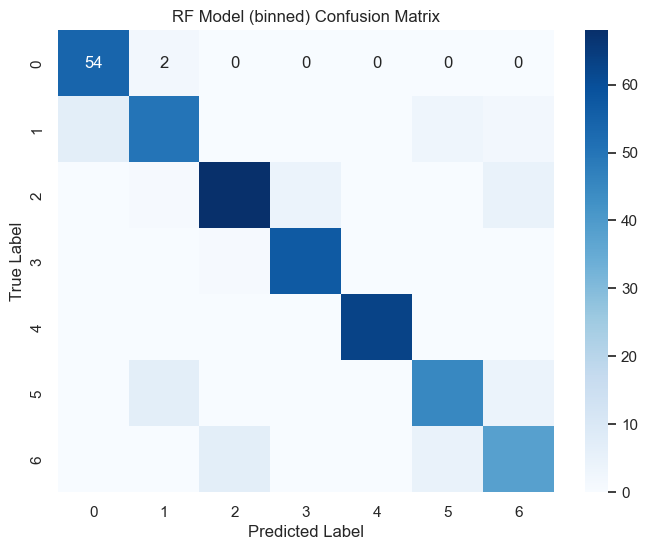

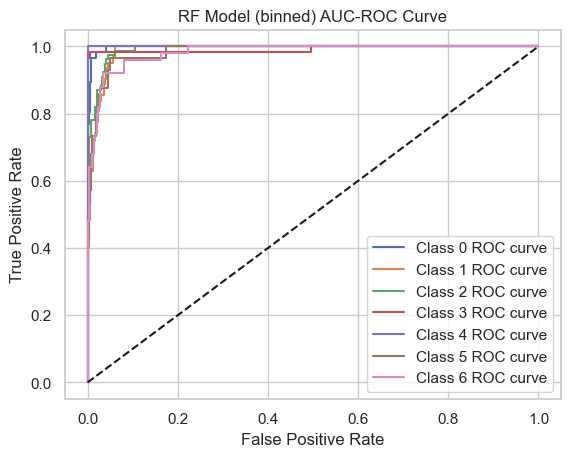


Evaluating Dataset: interaction
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020884DDD120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020884DDD120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.

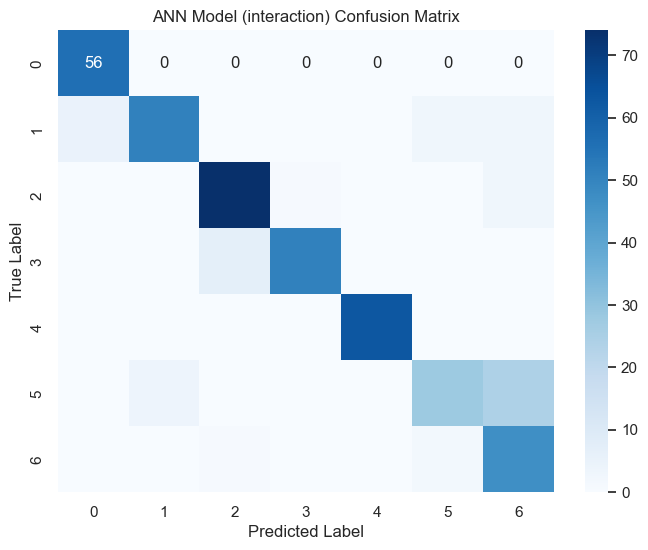

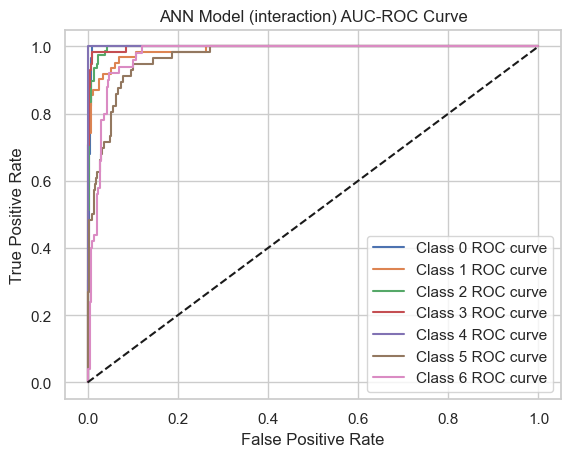

In [66]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Define evaluation function
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name, best_params):
    # Output best model parameters
    print(f"{model_name} Best Parameters: {best_params}")
    
    # Calculate accuracy, precision, recall, F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Print evaluation results
    print(f"{model_name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix as a heatmap
    plot_confusion_matrix(conf_matrix, title=f'{model_name} Confusion Matrix')

    # AUC-ROC curve
    if num_classes > 2:  # Multiclass case
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc = roc_auc_score(y_true_bin, y_proba, average='weighted', multi_class='ovr')

        # Plot multiclass ROC curve
        fpr = dict()
        tpr = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])

        plt.figure()
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
    else:  # Binary case
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Load results file
with open('model_results.json', 'r') as f:
    results = json.load(f)

# Load and evaluate the best model for each dataset
for version, result in results.items():
    print(f"\nEvaluating Dataset: {version}")

    X_test = None
    y_test = None

    # Select the corresponding test set based on the version
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    # Ensure X_test is a NumPy array with the correct dtype
    X_test = np.array(X_test, dtype=np.float32)
    num_classes = len(np.unique(y_test))

    # Evaluate Random Forest model
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        best_rf_params = result['RF']['params']
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF Model ({version})', best_rf_params)

    # Evaluate ANN model
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')

        # Suppress AutoGraph warnings
        @tf.autograph.experimental.do_not_convert
        def model_predict(model, data):
            return model.predict(data)

        best_ann_params = result['ANN']['params']
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = model_predict(best_ann_model, X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN Model ({version})', best_ann_params)



Evaluating Dataset: standard
RF Model (standard) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (standard) Evaluation Results:
Accuracy: 0.9669
Precision: 0.9673
Recall: 0.9669
F1 Score: 0.9669
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 1 58  0  0  0  2  1]
 [ 0  0 77  1  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  0  0  0  0  1 49]]


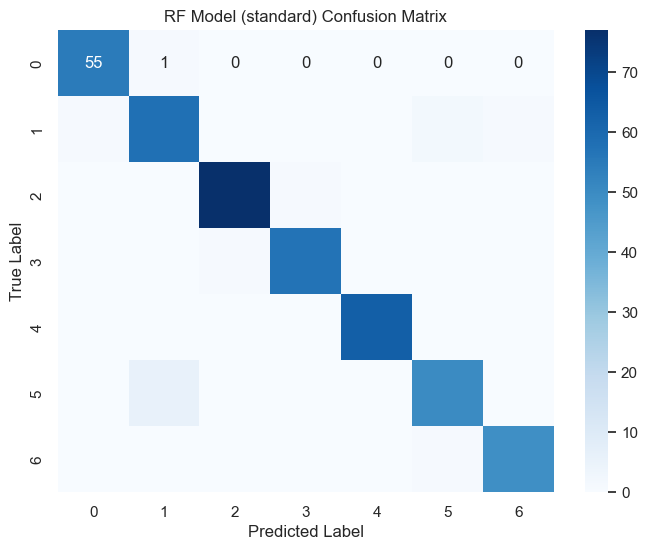

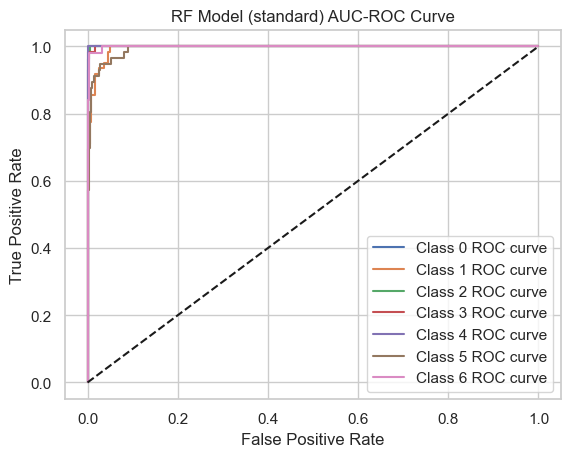


Evaluating Dataset: scaled
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089CDDCE50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089CDDCE50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.exper

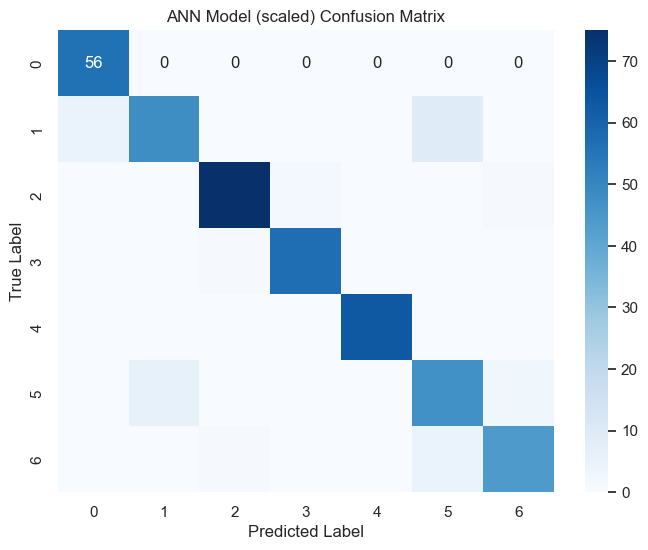

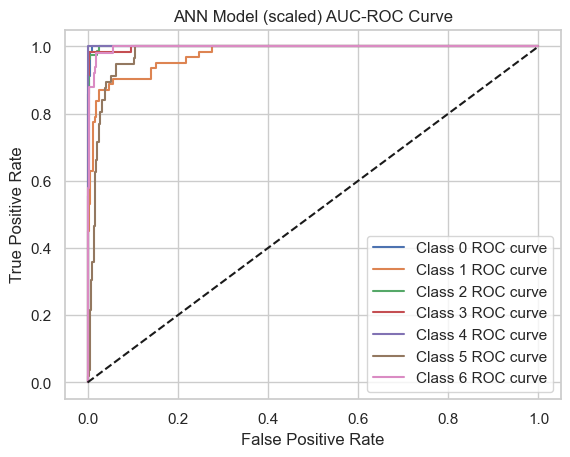


Evaluating Dataset: pca
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089C6E3F40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089C6E3F40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experime

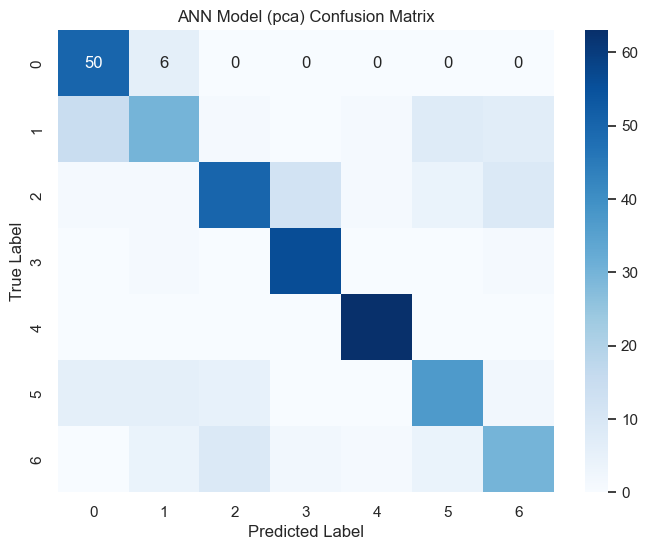

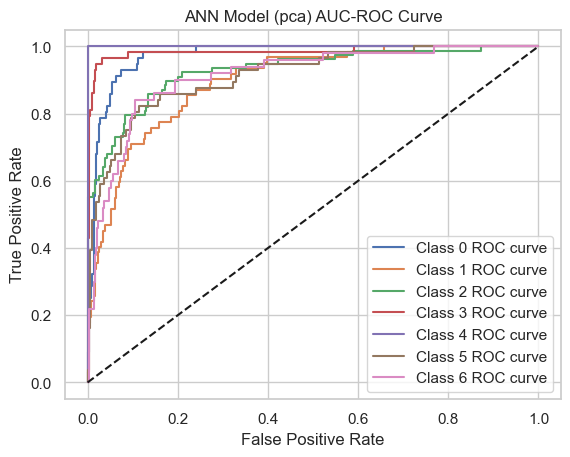


Evaluating Dataset: binned
RF Model (binned) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (binned) Evaluation Results:
Accuracy: 0.8865
Precision: 0.8855
Recall: 0.8865
F1 Score: 0.8855
Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 7 50  0  0  0  3  2]
 [ 0  1 68  4  0  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 45  4]
 [ 0  0  7  0  0  5 38]]


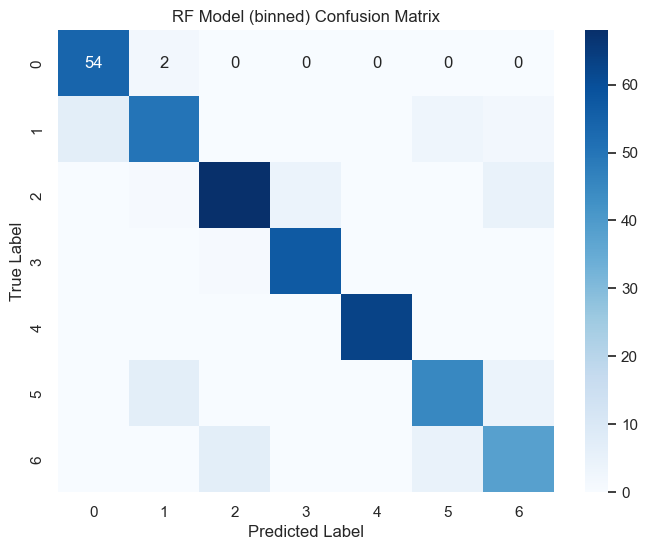

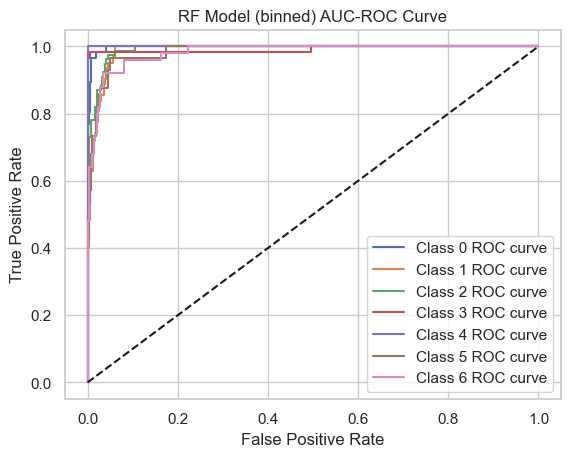


Evaluating Dataset: interaction
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089CF1C040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089CF1C040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.

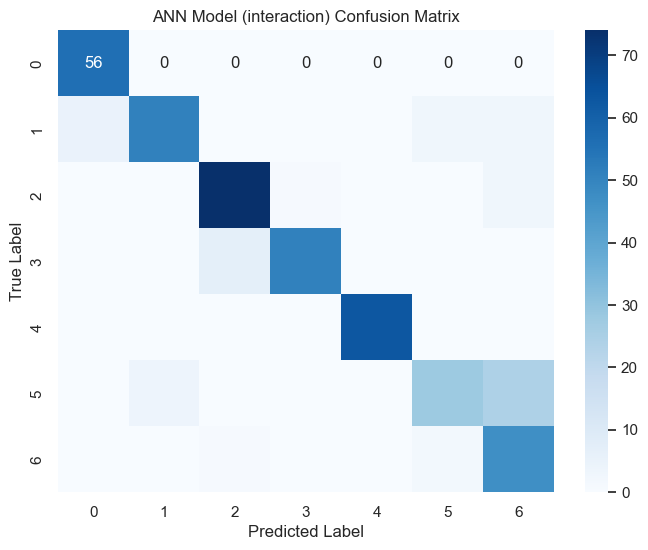

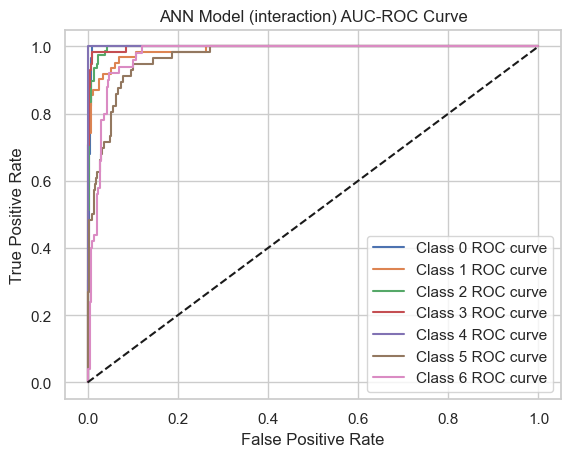

In [65]:
import numpy as np
import joblib
import json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import tensorflow as tf

# Load results file
with open('model_results.json', 'r') as f:
    results = json.load(f)

# Define evaluation function
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name, best_params):
    # Output best model parameters
    print(f"{model_name} Best Parameters: {best_params}")
    
    # Calculate accuracy, precision, recall, F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Print evaluation results
    print(f"{model_name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, 
                xticklabels=np.arange(num_classes), 
                yticklabels=np.arange(num_classes))
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # AUC-ROC curve
    if num_classes > 2:  # Multiclass case
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc = roc_auc_score(y_true_bin, y_proba, average='weighted', multi_class='ovr')

        # Plot multiclass ROC curve
        fpr = dict()
        tpr = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])

        plt.figure()
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
    else:  # Binary case
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Load and evaluate the best model for each dataset
for version, result in results.items():
    print(f"\nEvaluating Dataset: {version}")

    X_test = None
    y_test = None

    # Select the corresponding test set based on the version
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    # Ensure X_test is a NumPy array with the correct dtype
    X_test = np.array(X_test, dtype=np.float32)
    num_classes = len(np.unique(y_test))

    # Evaluate Random Forest model
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        best_rf_params = result['RF']['params']
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF Model ({version})', best_rf_params)

    # Evaluate ANN model
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')

        # Suppress AutoGraph warnings
        @tf.autograph.experimental.do_not_convert
        def model_predict(model, data):
            return model.predict(data)

        best_ann_params = result['ANN']['params']
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = model_predict(best_ann_model, X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN Model ({version})', best_ann_params)



Evaluating Dataset: standard
RF Model (standard) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (standard) Evaluation Results:
Accuracy: 0.9669
Precision: 0.9673
Recall: 0.9669
F1 Score: 0.9669
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 1 58  0  0  0  2  1]
 [ 0  0 77  1  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  0  0  0  0  1 49]]


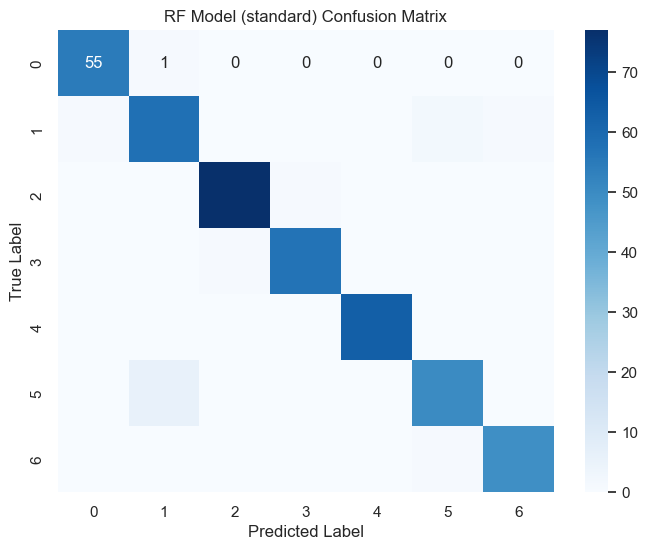

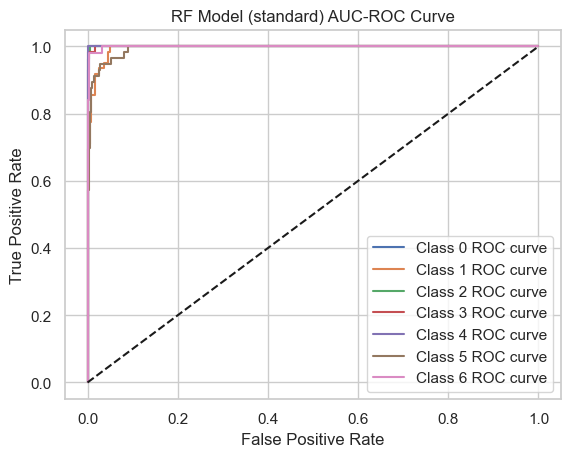


Evaluating Dataset: scaled
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020898493760>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020898493760>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.exper

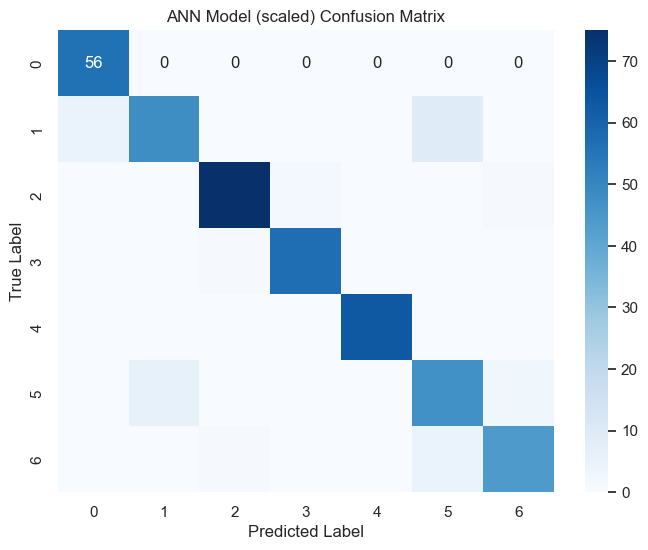

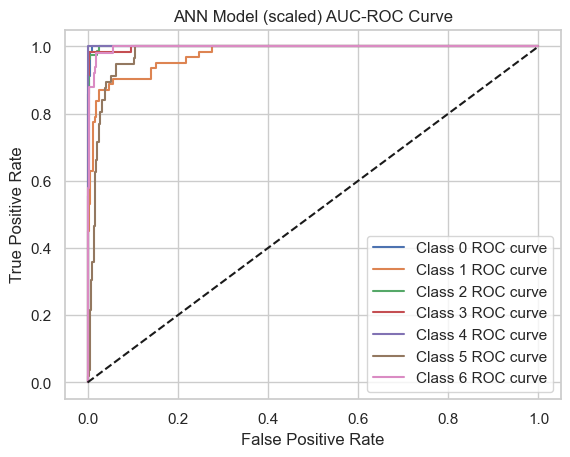


Evaluating Dataset: pca
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208861D3640>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208861D3640>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experime

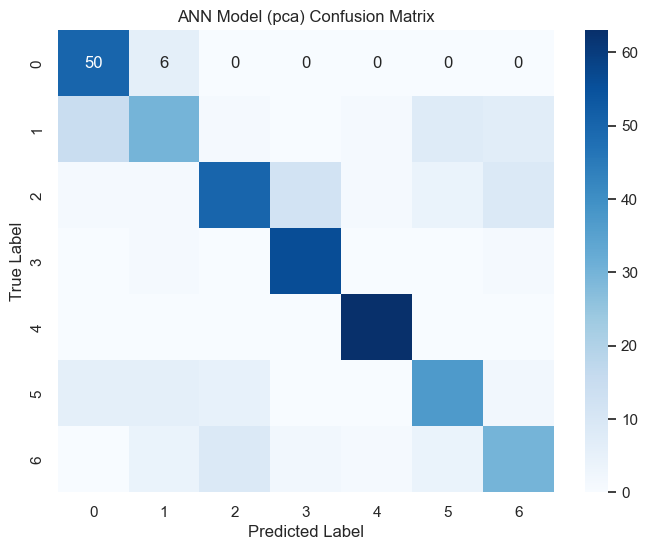

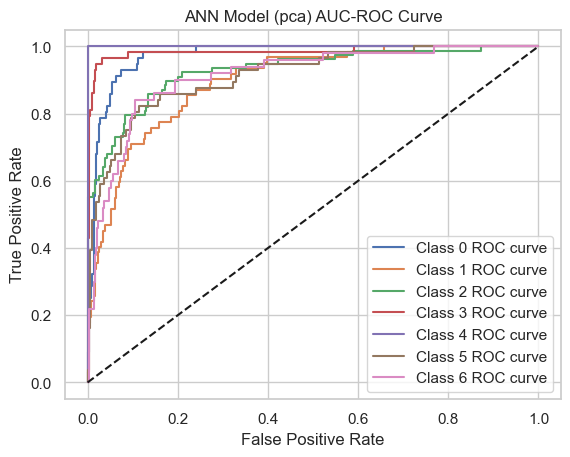


Evaluating Dataset: binned
RF Model (binned) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (binned) Evaluation Results:
Accuracy: 0.8865
Precision: 0.8855
Recall: 0.8865
F1 Score: 0.8855
Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 7 50  0  0  0  3  2]
 [ 0  1 68  4  0  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 45  4]
 [ 0  0  7  0  0  5 38]]


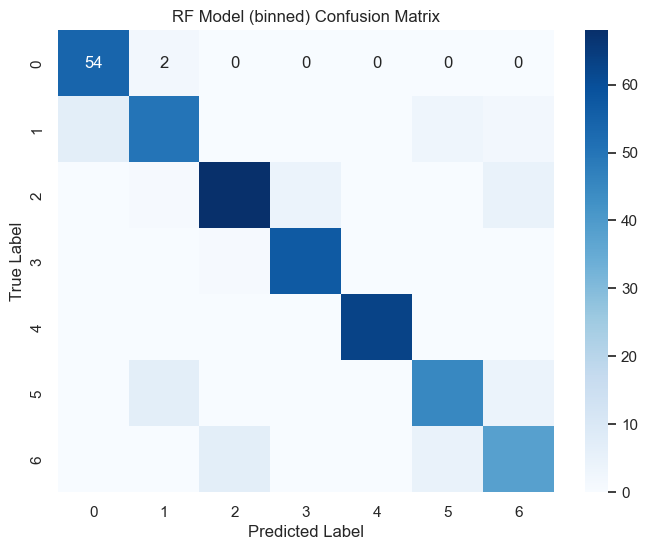

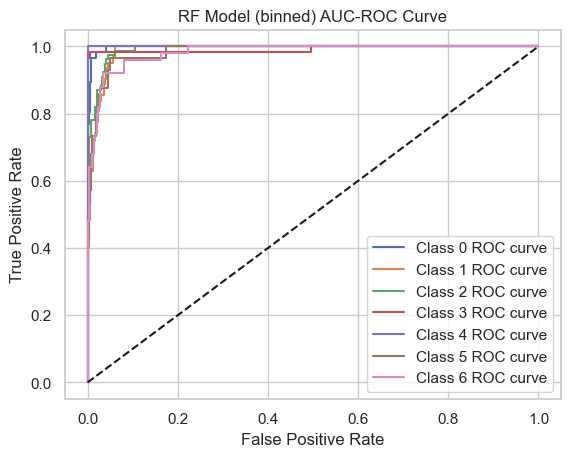


Evaluating Dataset: interaction
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089AB388B0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089AB388B0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.

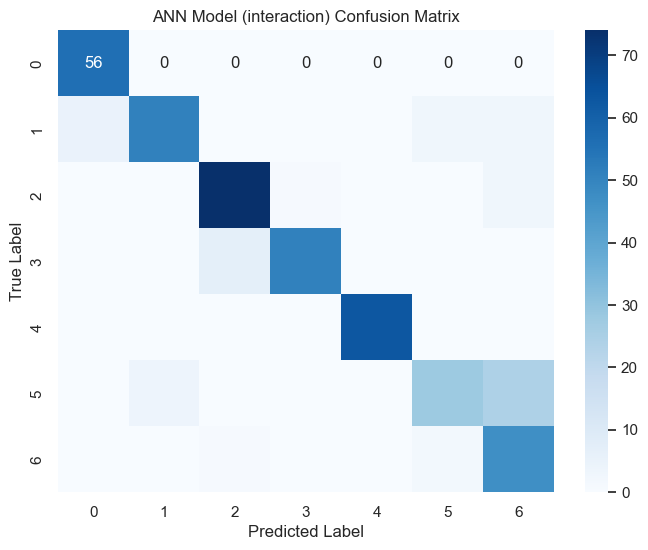

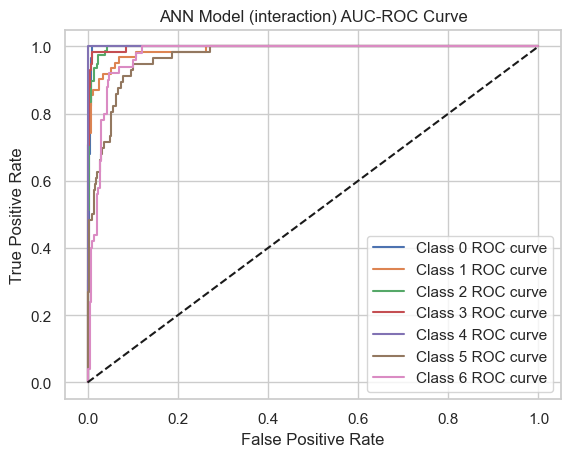

In [64]:
import numpy as np
import joblib
import json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import tensorflow as tf

# Load results file
with open('model_results.json', 'r') as f:
    results = json.load(f)

# Define evaluation function
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name, best_params):
    # Output best model parameters
    print(f"{model_name} Best Parameters: {best_params}")
    
    # Calculate accuracy, precision, recall, F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Print evaluation results
    print(f"{model_name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # AUC-ROC curve
    if num_classes > 2:  # Multiclass case
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc = roc_auc_score(y_true_bin, y_proba, average='weighted', multi_class='ovr')

        # Plot multiclass ROC curve
        fpr = dict()
        tpr = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])

        plt.figure()
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
    else:  # Binary case
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Load and evaluate the best model for each dataset
for version, result in results.items():
    print(f"\nEvaluating Dataset: {version}")

    X_test = None
    y_test = None

    # Select the corresponding test set based on the version
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    # Ensure X_test is a NumPy array with the correct dtype
    X_test = np.array(X_test, dtype=np.float32)
    num_classes = len(np.unique(y_test))

    # Evaluate Random Forest model
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        best_rf_params = result['RF']['params']
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF Model ({version})', best_rf_params)

    # Evaluate ANN model
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')

        # Suppress AutoGraph warnings
        @tf.autograph.experimental.do_not_convert
        def model_predict(model, data):
            return model.predict(data)

        best_ann_params = result['ANN']['params']
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = model_predict(best_ann_model, X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN Model ({version})', best_ann_params)



Evaluating Dataset: standard
RF Model (standard) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (standard) Evaluation Results:
Accuracy: 0.9669
Precision: 0.9673
Recall: 0.9669
F1 Score: 0.9669
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 1 58  0  0  0  2  1]
 [ 0  0 77  1  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  0  0  0  0  1 49]]


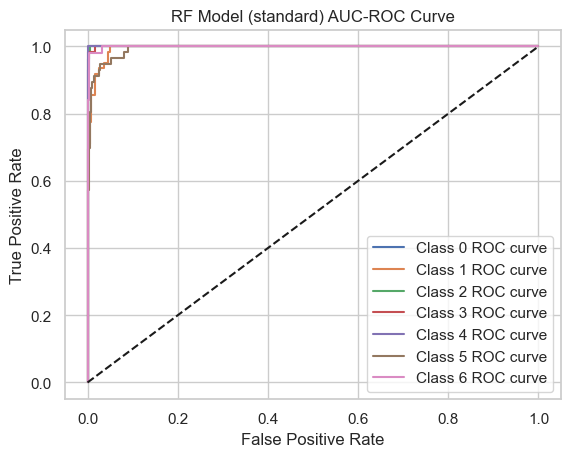


Evaluating Dataset: scaled
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A73C0D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A73C0D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.exper

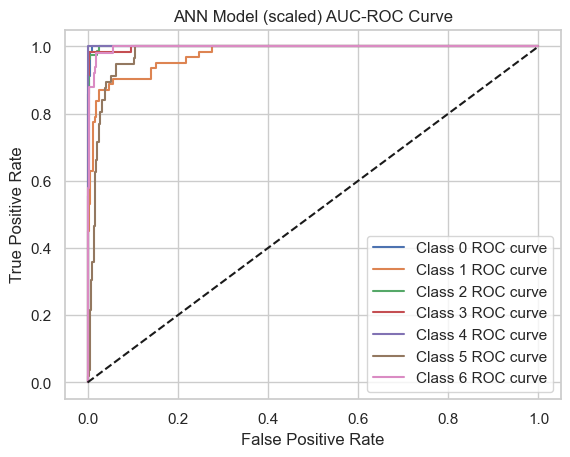


Evaluating Dataset: pca
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A735E10>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A735E10>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experime

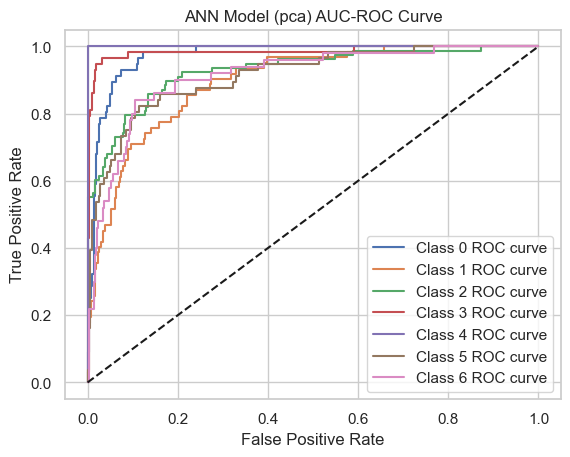


Evaluating Dataset: binned
RF Model (binned) Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF Model (binned) Evaluation Results:
Accuracy: 0.8865
Precision: 0.8855
Recall: 0.8865
F1 Score: 0.8855
Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 7 50  0  0  0  3  2]
 [ 0  1 68  4  0  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 45  4]
 [ 0  0  7  0  0  5 38]]


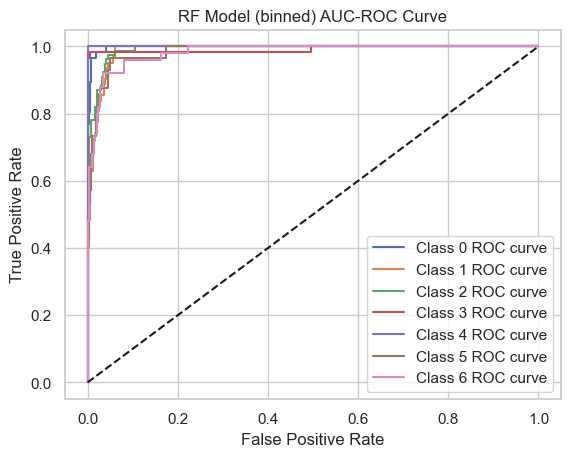


Evaluating Dataset: interaction
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208923BEDD0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208923BEDD0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.

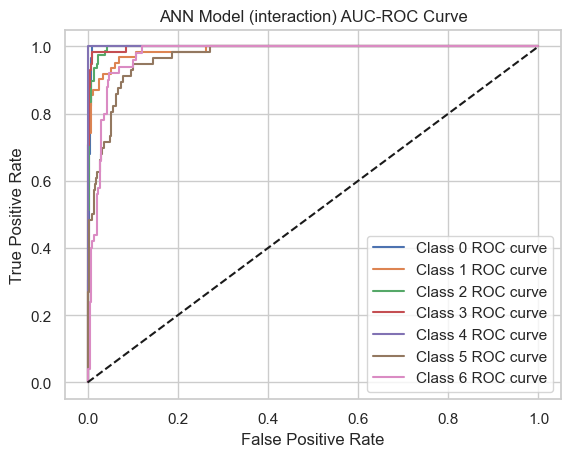

In [63]:
import numpy as np
import joblib
import json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load results file
with open('model_results.json', 'r') as f:
    results = json.load(f)

# Define evaluation function
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name, best_params):
    # Output best model parameters
    print(f"{model_name} Best Parameters: {best_params}")
    
    # Calculate accuracy, precision, recall, F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Print evaluation results
    print(f"{model_name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # AUC-ROC curve
    if num_classes > 2:  # Multiclass case
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc = roc_auc_score(y_true_bin, y_proba, average='weighted', multi_class='ovr')

        # Plot multiclass ROC curve
        fpr = dict()
        tpr = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])

        plt.figure()
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
    else:  # Binary case
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Load and evaluate the best model for each dataset
for version, result in results.items():
    print(f"\nEvaluating Dataset: {version}")

    X_test = None
    y_test = None

    # Select the corresponding test set based on the version
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    # Ensure X_test is a NumPy array with the correct dtype
    X_test = np.array(X_test, dtype=np.float32)
    num_classes = len(np.unique(y_test))

    # Evaluate Random Forest model
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        best_rf_params = result['RF']['params']
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF Model ({version})', best_rf_params)

    # Evaluate ANN model
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')
        best_ann_params = result['ANN']['params']
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = best_ann_model.predict(X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN Model ({version})', best_ann_params)



评估数据集: standard
RF模型（standard） 最佳参数: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF模型（standard）评估结果：
准确率: 0.9669
精确率: 0.9673
召回率: 0.9669
F1分数: 0.9669
混淆矩阵:
[[55  1  0  0  0  0  0]
 [ 1 58  0  0  0  2  1]
 [ 0  0 77  1  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  0  0  0  0  1 49]]


C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


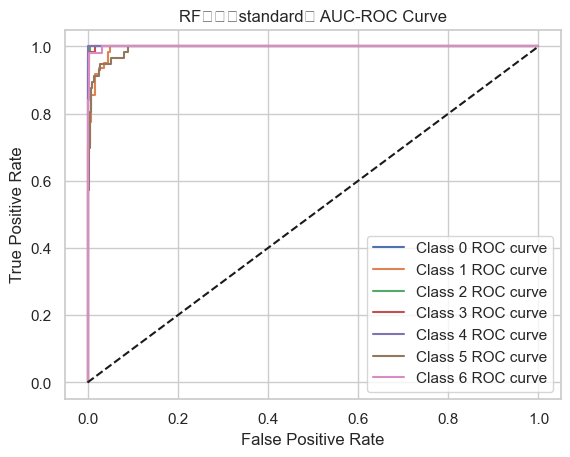


评估数据集: scaled
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020883AAB520>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020883AAB520>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_no

C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


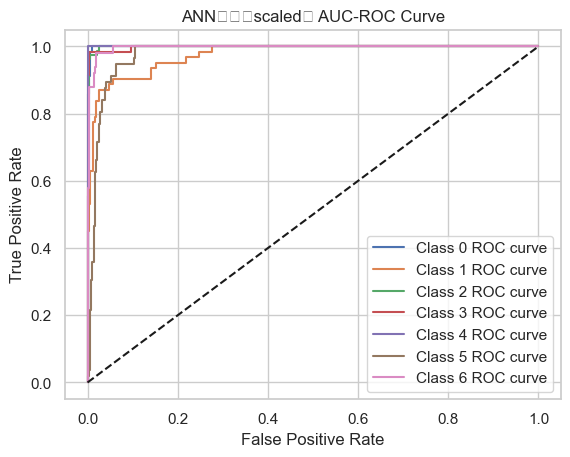


评估数据集: pca
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208835D1900>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208835D1900>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_c

C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


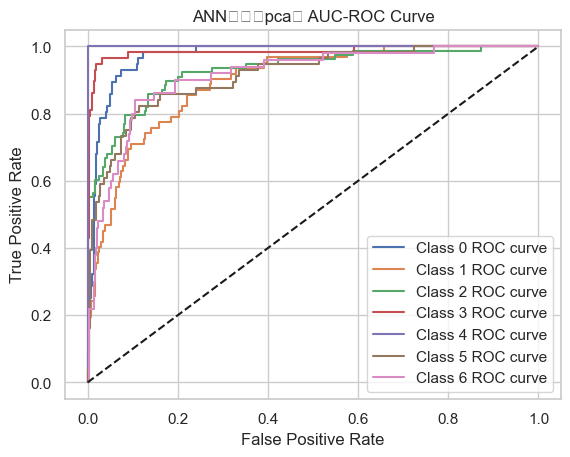


评估数据集: binned
RF模型（binned） 最佳参数: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
RF模型（binned）评估结果：
准确率: 0.8865
精确率: 0.8855
召回率: 0.8865
F1分数: 0.8855
混淆矩阵:
[[54  2  0  0  0  0  0]
 [ 7 50  0  0  0  3  2]
 [ 0  1 68  4  0  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 45  4]
 [ 0  0  7  0  0  5 38]]


C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


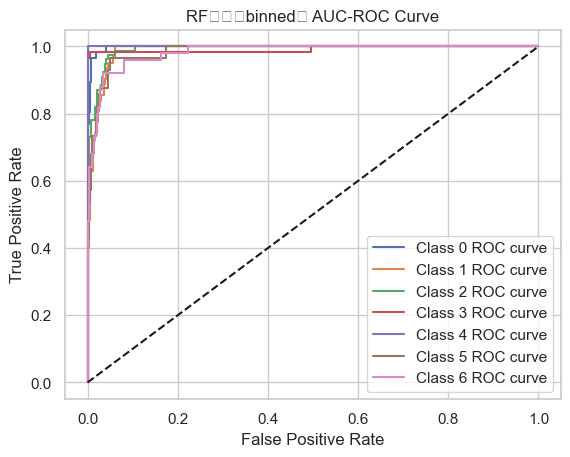


评估数据集: interaction


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [62]:
import numpy as np
import joblib
import json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# 加载结果文件
with open('model_results.json', 'r') as f:
    results = json.load(f)

# 定义评估函数
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name, best_params):
    # 输出最佳模型的类别和参数
    print(f"{model_name} 最佳参数: {best_params}")
    
    # 计算准确率、精确率、召回率、F1分数
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # 打印评估结果
    print(f"{model_name}评估结果：")
    print(f"准确率: {accuracy:.4f}")
    print(f"精确率: {precision:.4f}")
    print(f"召回率: {recall:.4f}")
    print(f"F1分数: {f1:.4f}")

    # 混淆矩阵
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("混淆矩阵:")
    print(conf_matrix)

    # AUC-ROC曲线
    if num_classes > 2:  # 多分类情况
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc = roc_auc_score(y_true_bin, y_proba, average='weighted', multi_class='ovr')

        # 绘制多分类ROC曲线
        fpr = dict()
        tpr = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])

        plt.figure()
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
    else:  # 二分类情况
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# 加载并评估每个数据集下的最佳模型
for version, result in results.items():
    print(f"\n评估数据集: {version}")

    X_test = None
    y_test = None

    # 根据版本选择测试集
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    num_classes = len(np.unique(y_test))

    # 评估随机森林模型
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        best_rf_params = result['RF']['params']
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF模型（{version}）', best_rf_params)

    # 评估人工神经网络模型
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')
        best_ann_params = result['ANN']['params']
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = best_ann_model.predict(X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN模型（{version}）', best_ann_params)
import numpy as np
import joblib
import json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# 加载结果文件
with open('model_results.json', 'r') as f:
    results = json.load(f)

# 定义评估函数
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name, best_params):
    # 输出最佳模型的类别和参数
    print(f"{model_name} 最佳参数: {best_params}")
    
    # 计算准确率、精确率、召回率、F1分数
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # 打印评估结果
    print(f"{model_name}评估结果：")
    print(f"准确率: {accuracy:.4f}")
    print(f"精确率: {precision:.4f}")
    print(f"召回率: {recall:.4f}")
    print(f"F1分数: {f1:.4f}")

    # 混淆矩阵
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("混淆矩阵:")
    print(conf_matrix)

    # AUC-ROC曲线
    if num_classes > 2:  # 多分类情况
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc = roc_auc_score(y_true_bin, y_proba, average='weighted', multi_class='ovr')

        # 绘制多分类ROC曲线
        fpr = dict()
        tpr = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])

        plt.figure()
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
    else:  # 二分类情况
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# 加载并评估每个数据集下的最佳模型
for version, result in results.items():
    print(f"\n评估数据集: {version}")

    X_test = None
    y_test = None

    # 根据版本选择测试集
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    num_classes = len(np.unique(y_test))

    # 评估随机森林模型
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        best_rf_params = result['RF']['params']
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF模型（{version}）', best_rf_params)

    # 评估人工神经网络模型
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')
        best_ann_params = result['ANN']['params']
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = best_ann_model.predict(X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN模型（{version}）', best_ann_params)


In [61]:
import numpy as np
import joblib
import json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# 加载结果文件
with open('model_results.json', 'r') as f:
    results = json.load(f)

# 定义评估函数
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name):
    # 计算准确率、精确率、召回率、F1分数
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # 打印评估结果
    print(f"{model_name}评估结果：")
    print(f"准确率: {accuracy:.4f}")
    print(f"精确率: {precision:.4f}")
    print(f"召回率: {recall:.4f}")
    print(f"F1分数: {f1:.4f}")

    # 混淆矩阵
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("混淆矩阵:")
    print(conf_matrix)

    # AUC-ROC曲线
    if num_classes == 2:  # 二分类情况下计算AUC-ROC
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    else:  # 多分类情况下计算加权AUC-ROC
        auc = roc_auc_score(y_true, y_proba, average='weighted', multi_class='ovr')
        fpr, tpr, _ = roc_curve(y_true.ravel(), y_proba.ravel())

    print(f"AUC-ROC: {auc:.4f}")

    # 绘制ROC曲线
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# 加载并评估每个数据集下的最佳模型
for version, result in results.items():
    print(f"\n评估数据集: {version}")

    X_test = None
    y_test = None

    # 根据版本选择测试集
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    num_classes = len(np.unique(y_test))

    # 评估随机森林模型
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF模型（{version}）')

    # 评估人工神经网络模型
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = best_ann_model.predict(X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN模型（{version}）')



评估数据集: standard
RF模型（standard）评估结果：
准确率: 0.9669
精确率: 0.9673
召回率: 0.9669
F1分数: 0.9669
混淆矩阵:
[[55  1  0  0  0  0  0]
 [ 1 58  0  0  0  2  1]
 [ 0  0 77  1  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 50  0]
 [ 0  0  0  0  0  1 49]]


ValueError: multiclass format is not supported

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


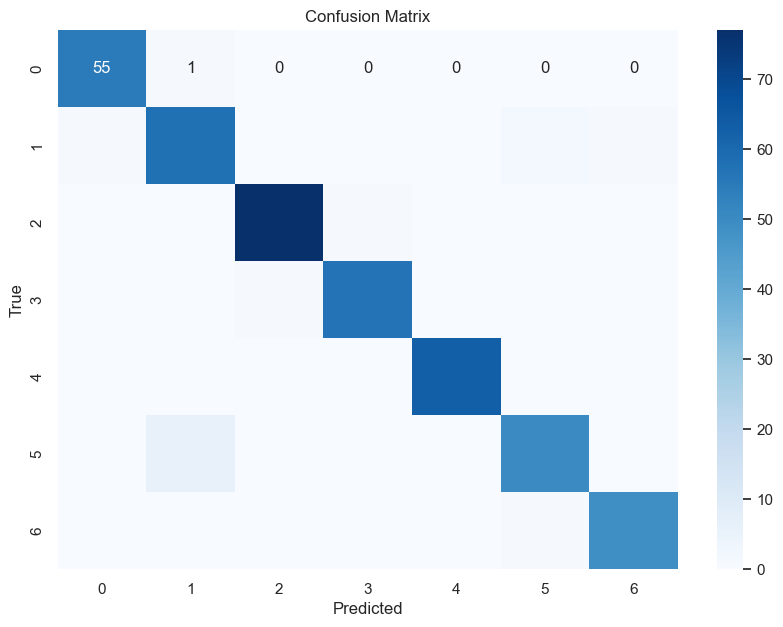

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020887650280>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020887650280>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

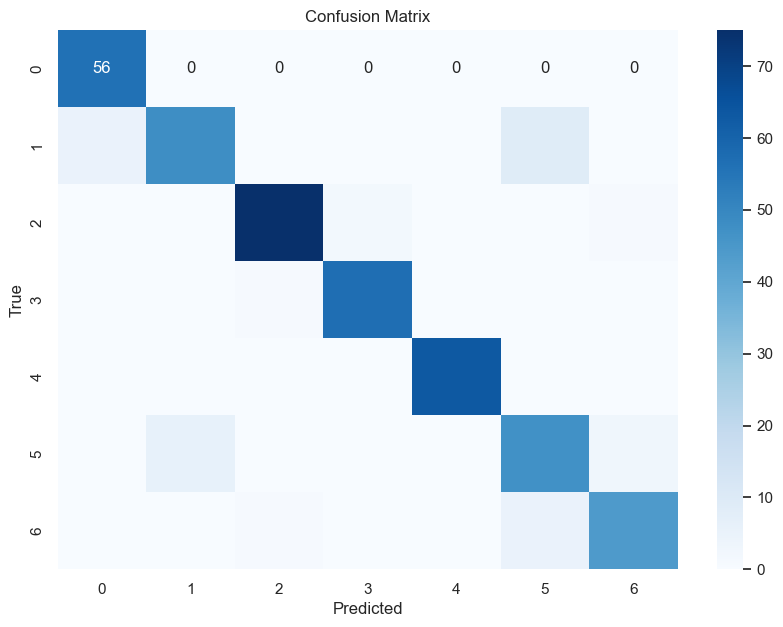

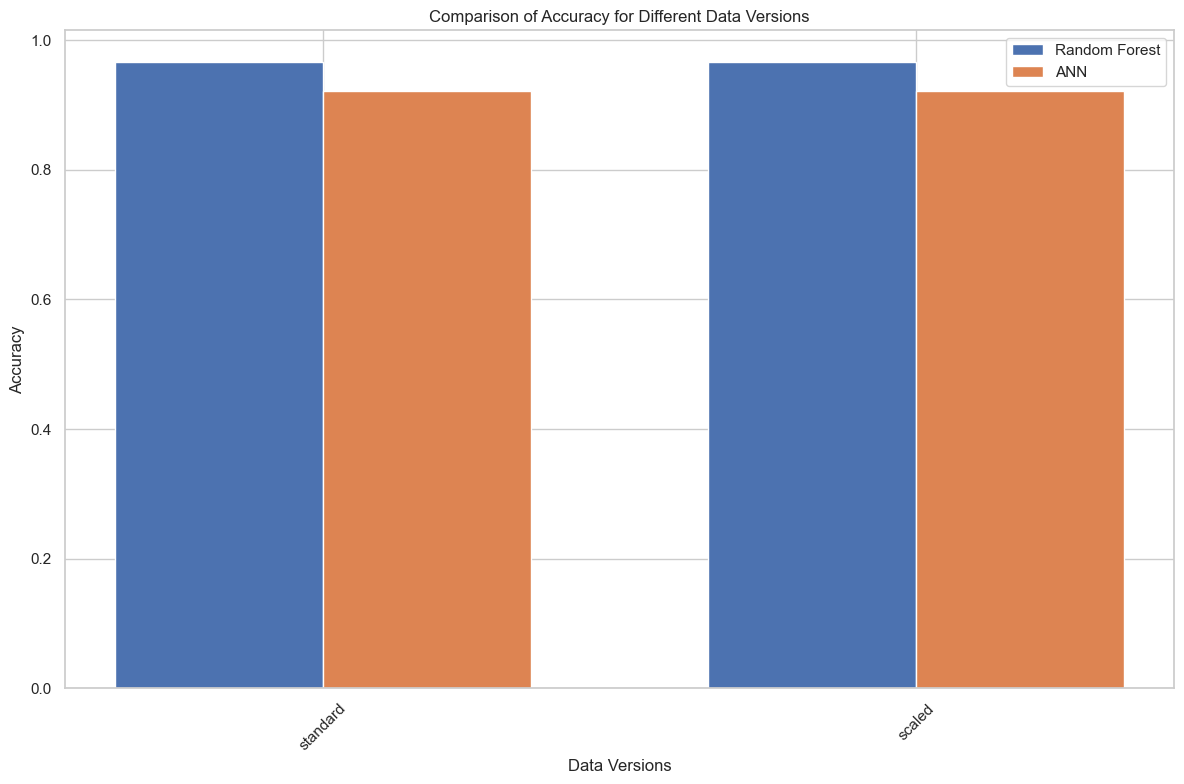

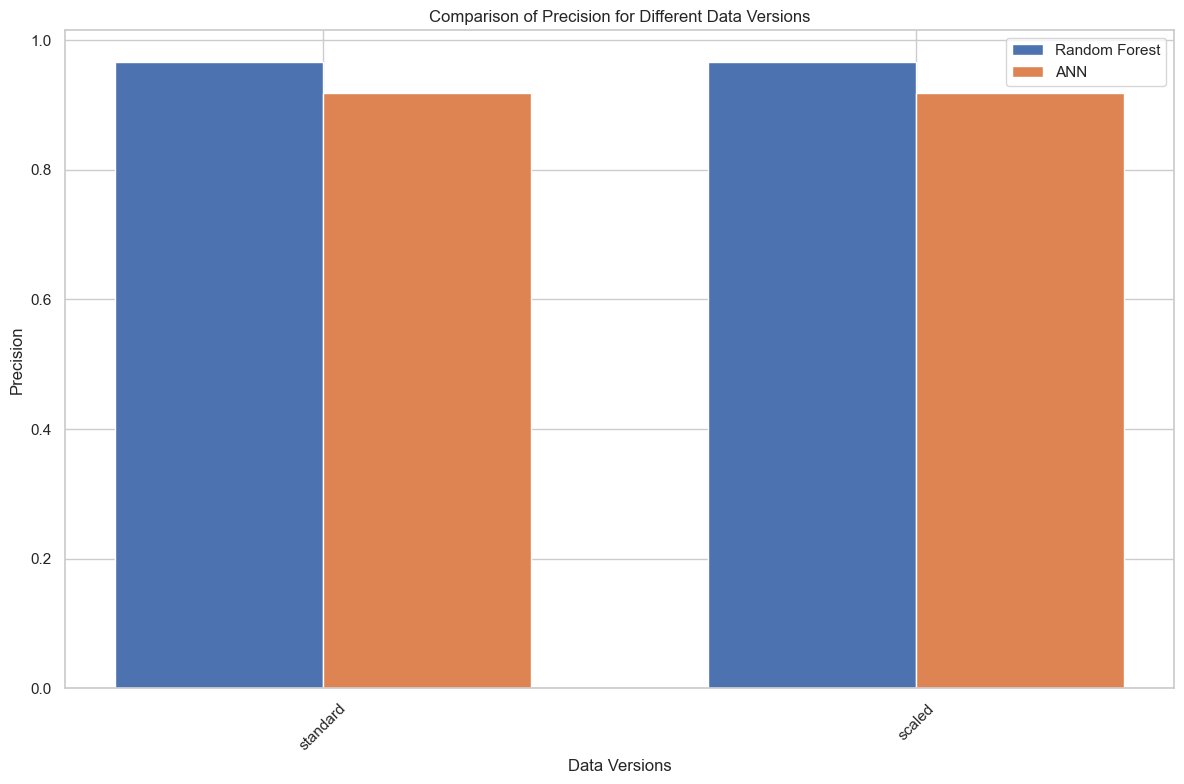

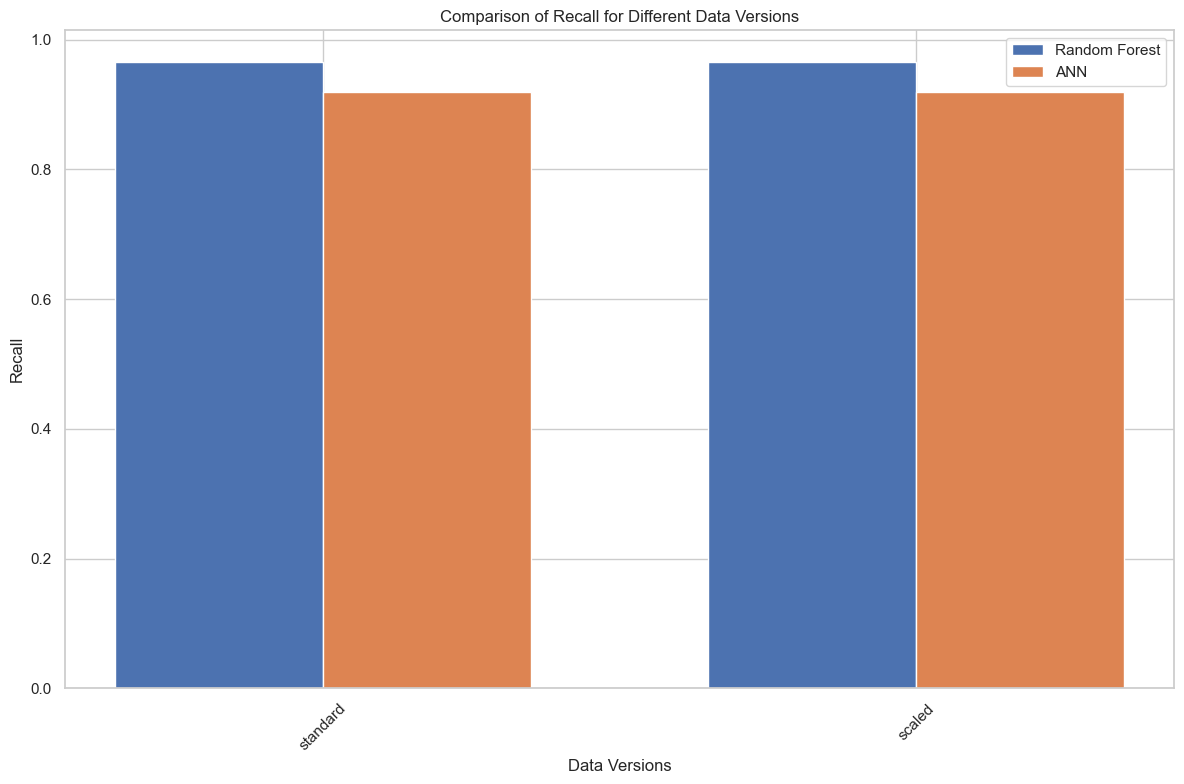

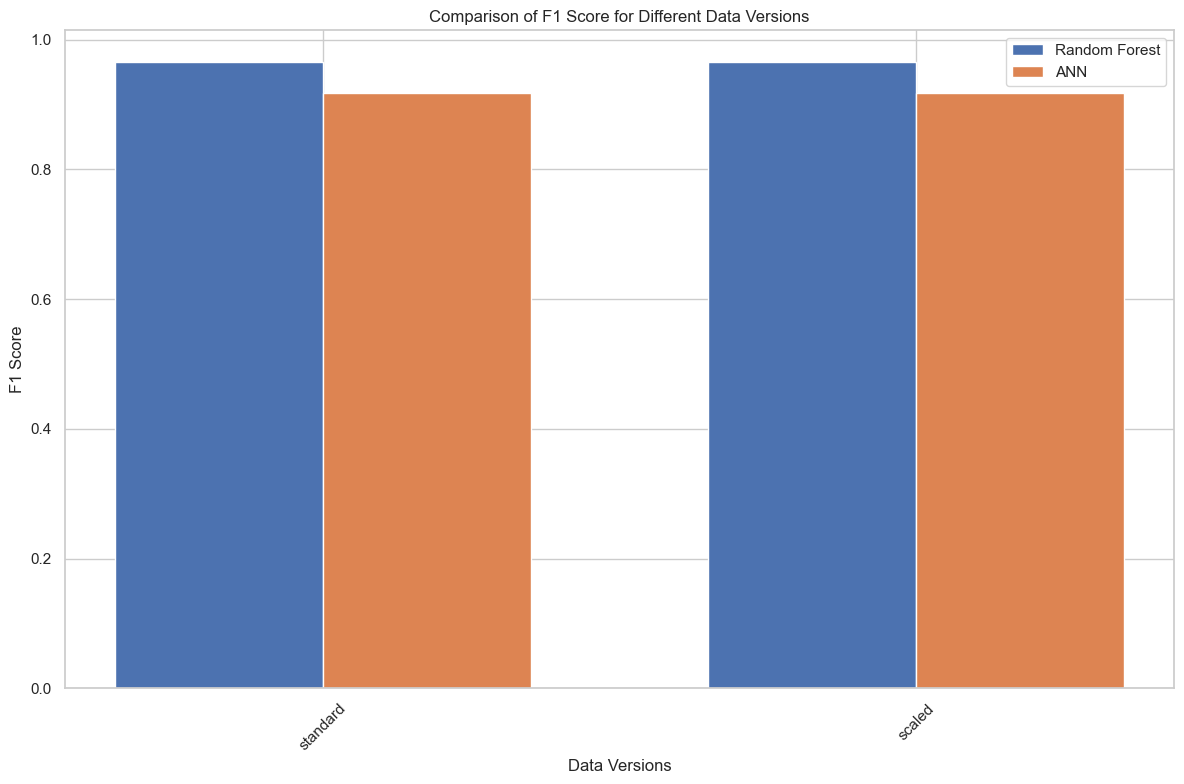

Best preprocessing: standard
Best model: RF
Best F1 Score: 0.9661282834920291
Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}


In [60]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba=None, num_classes=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # 输出所有指标
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # 生成混淆矩阵
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # 如果有概率预测值，则绘制 ROC 曲线
    if y_proba is not None and num_classes == 2:
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        auc = roc_auc_score(y_true, y_proba)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
        metrics['AUC'] = auc

    return metrics


# Find best RF and ANN models based on accuracy
best_rf_version = max(results, key=lambda x: results[x]['RF']['accuracy'] if 'RF' in results[x] else -1)
best_ann_version = max(results, key=lambda x: results[x]['ANN']['accuracy'] if 'ANN' in results[x] else -1)

# Evaluate the best RF model on its corresponding dataset
if 'RF' in results[best_rf_version]:
    best_rf_model = joblib.load(f'RF_best_model_{best_rf_version}.pkl')
    X_test_rf = datasets[best_rf_version][1]
    y_test_rf = datasets[best_rf_version][3]
    y_pred_rf = best_rf_model.predict(X_test_rf)
    rf_metrics = evaluate_model(y_test_rf, y_pred_rf)
else:
    rf_metrics = None

# Evaluate the best ANN model on its corresponding dataset
if 'ANN' in results[best_ann_version]:
    best_ann_model = load_model(f'ANN_best_model_{best_ann_version}.h5')
    X_test_ann = datasets[best_ann_version][1]
    y_test_ann = datasets[best_ann_version][3]
    y_test_ann_cat = to_categorical(y_test_ann, num_classes=num_classes)
    y_pred_ann = best_ann_model.predict(X_test_ann)
    y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)

    ann_metrics = evaluate_model(
        y_test_ann, y_pred_ann_labels, 
        y_proba=y_pred_ann[:, 1] if num_classes == 2 else None
    )
else:
    ann_metrics = None

# Combine evaluation results
eval_results = {}
if rf_metrics:
    eval_results[best_rf_version] = {'RF': rf_metrics}
if ann_metrics:
    eval_results[best_ann_version] = {'ANN': ann_metrics}

# Save evaluation results to JSON
with open('evaluation_results.json', 'w') as f:
    json.dump(eval_results, f)

# Plot performance comparison
def plot_performance_comparison(eval_results, metric_name):
    rf_scores = [eval_results[version]['RF'][metric_name] for version in eval_results if 'RF' in eval_results[version]]
    ann_scores = [eval_results[version]['ANN'][metric_name] for version in eval_results if 'ANN' in eval_results[version]]
    versions = list(eval_results.keys())

    x = np.arange(len(versions))
    width = 0.35

    plt.figure(figsize=(12, 8))
    plt.bar(x - width/2, rf_scores, width, label='Random Forest')
    plt.bar(x + width/2, ann_scores, width, label='ANN')

    plt.xlabel('Data Versions')
    plt.ylabel(metric_name)
    plt.title(f'Comparison of {metric_name} for Different Data Versions')
    plt.xticks(x, versions, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot comparison for each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']:
    if any(metric in eval_results.get(version, {}).get('RF', {}) for version in eval_results) or \
       any(metric in eval_results.get(version, {}).get('ANN', {}) for version in eval_results):
        plot_performance_comparison(eval_results, metric)

# Selection of the best preprocessing method
def select_best_preprocessing(eval_results, primary_metric='F1 Score'):
    best_version = None
    best_score = 0
    best_model_type = None
    best_params = None

    for version, result in eval_results.items():
        for model_type, metrics in result.items():
            if metrics.get(primary_metric, 0) > best_score:
                best_score = metrics[primary_metric]
                best_version = version
                best_model_type = model_type
                best_params = results[version][model_type]['params']

    print(f"Best preprocessing: {best_version}")
    print(f"Best model: {best_model_type}")
    print(f"Best {primary_metric}: {best_score}")
    print(f"Best parameters: {best_params}")

# Select the best preprocessing based on F1 Score
select_best_preprocessing(eval_results, primary_metric='F1 Score')


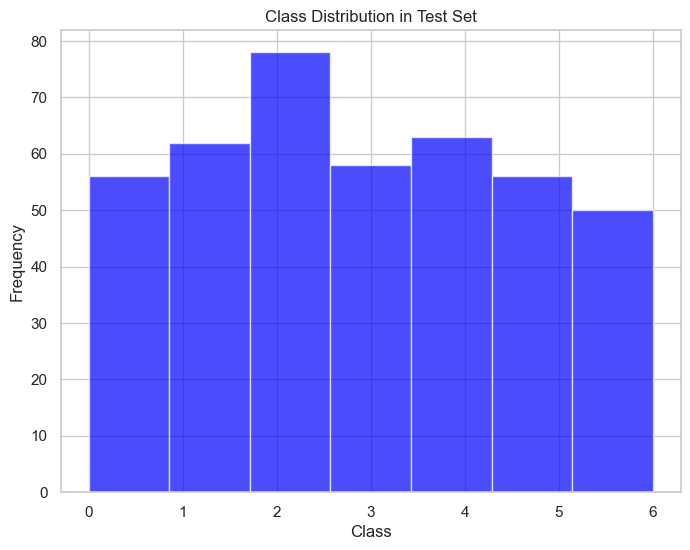

In [59]:
import matplotlib.pyplot as plt

# 绘制测试集类别分布
def plot_class_distribution(y_test, num_classes):
    plt.figure(figsize=(8, 6))
    plt.hist(y_test, bins=num_classes, color='blue', alpha=0.7)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution in Test Set')
    plt.show()

# 使用测试集数据调用
plot_class_distribution(y_test, num_classes=num_classes)


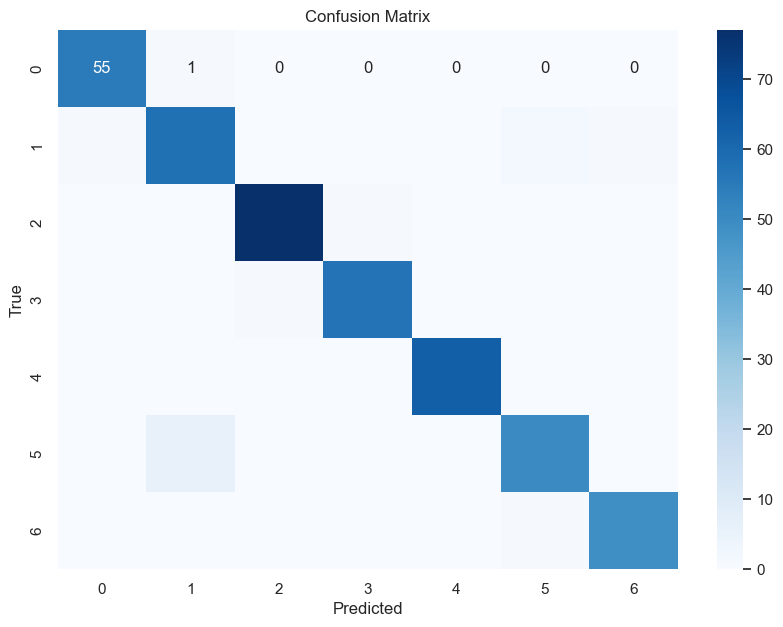

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A7668C0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002089A7668C0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

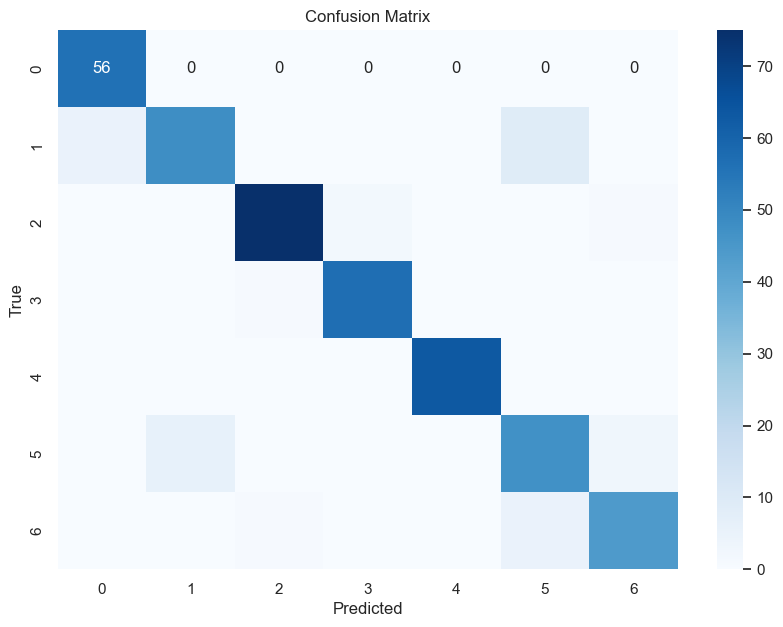

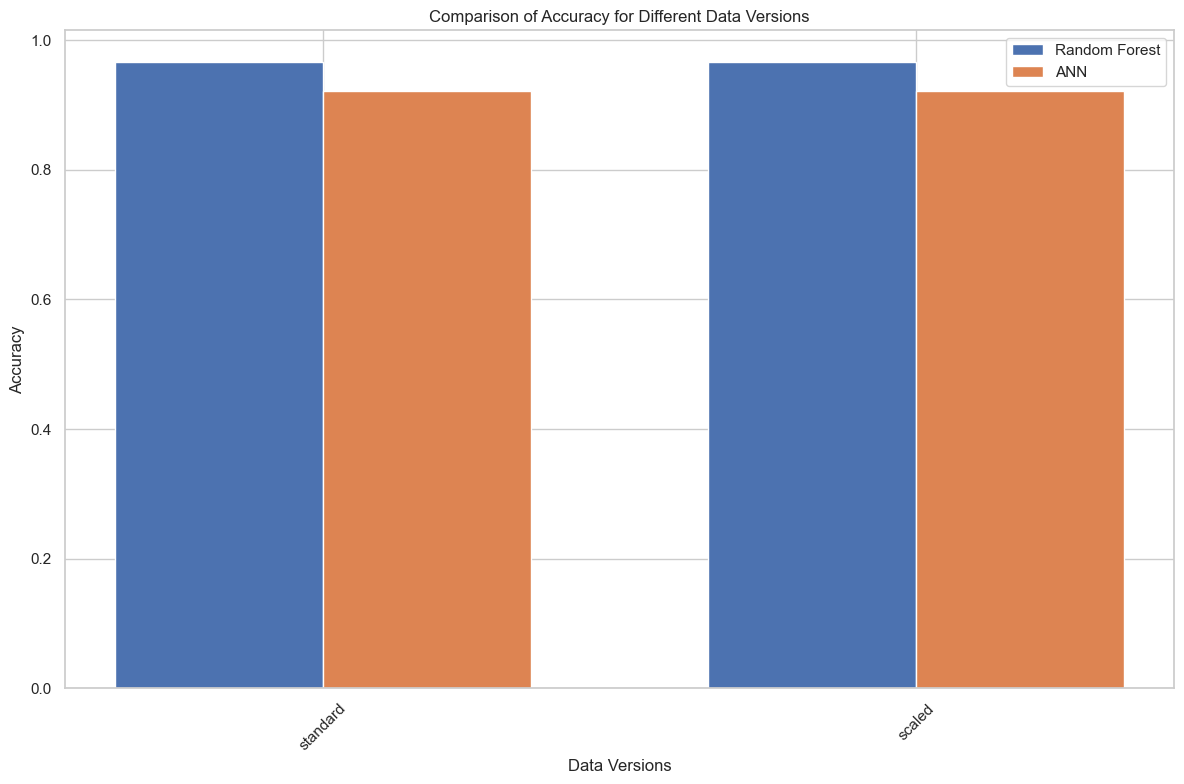

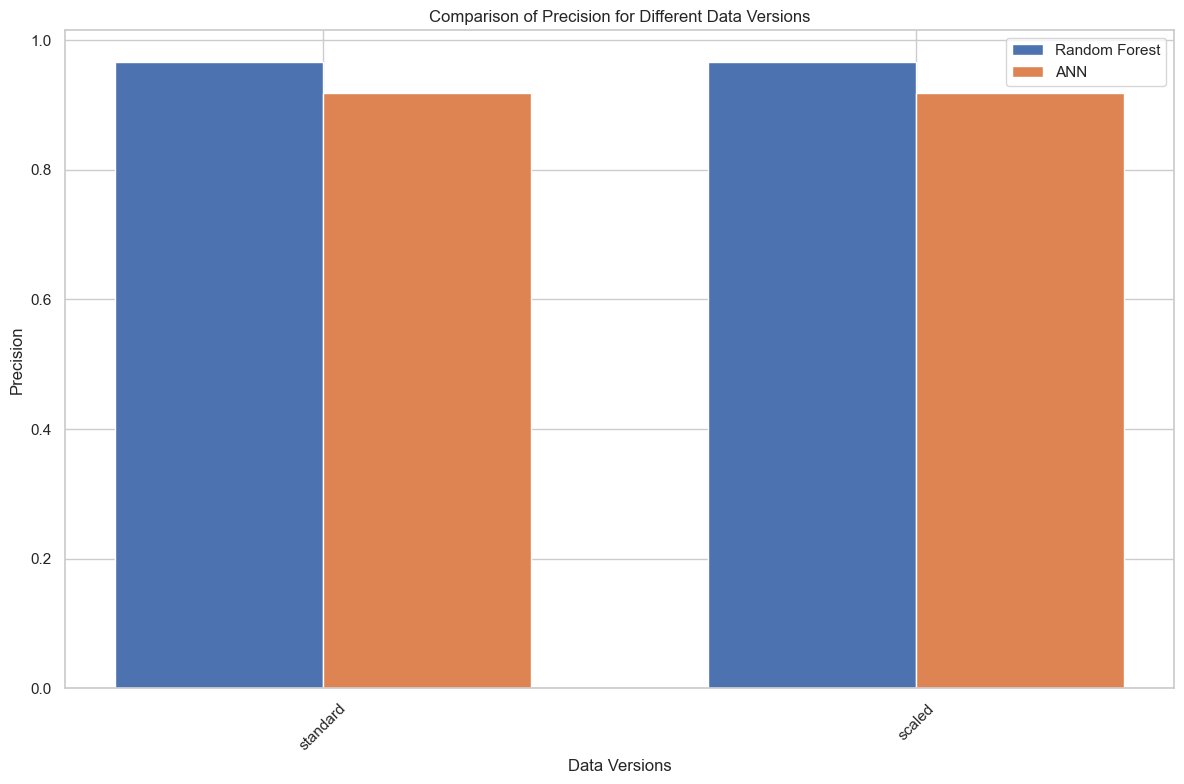

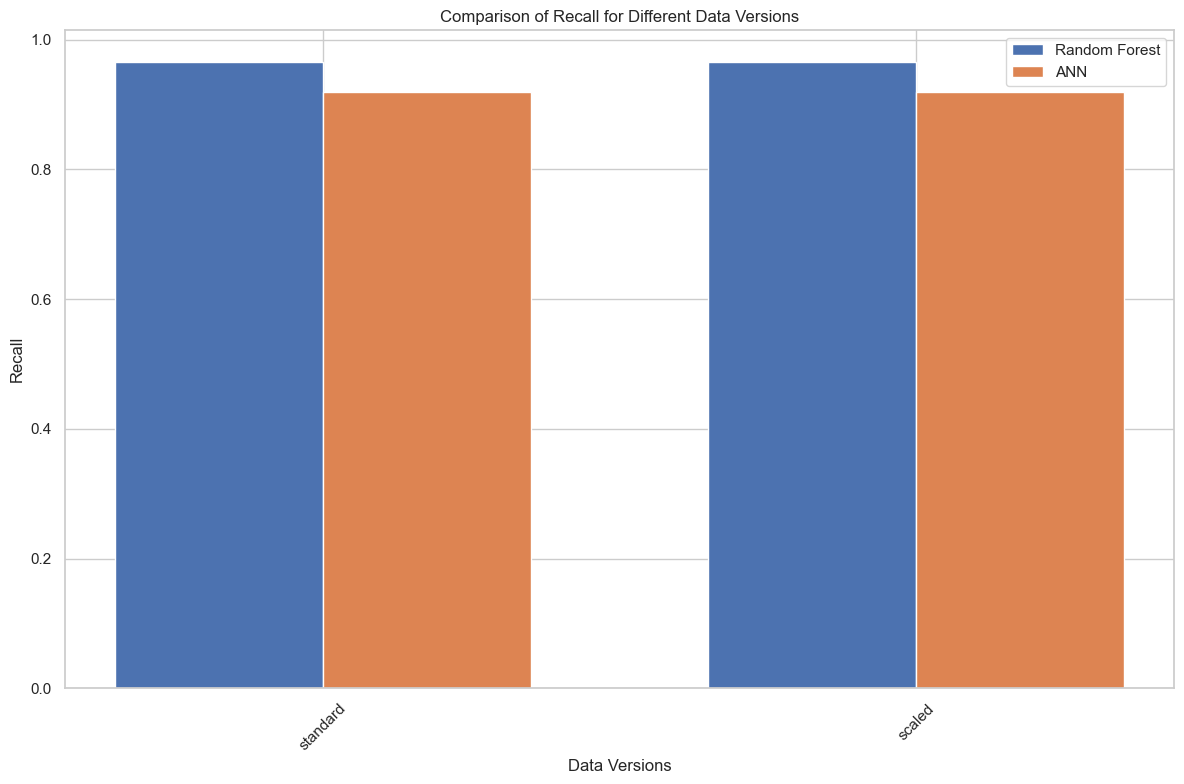

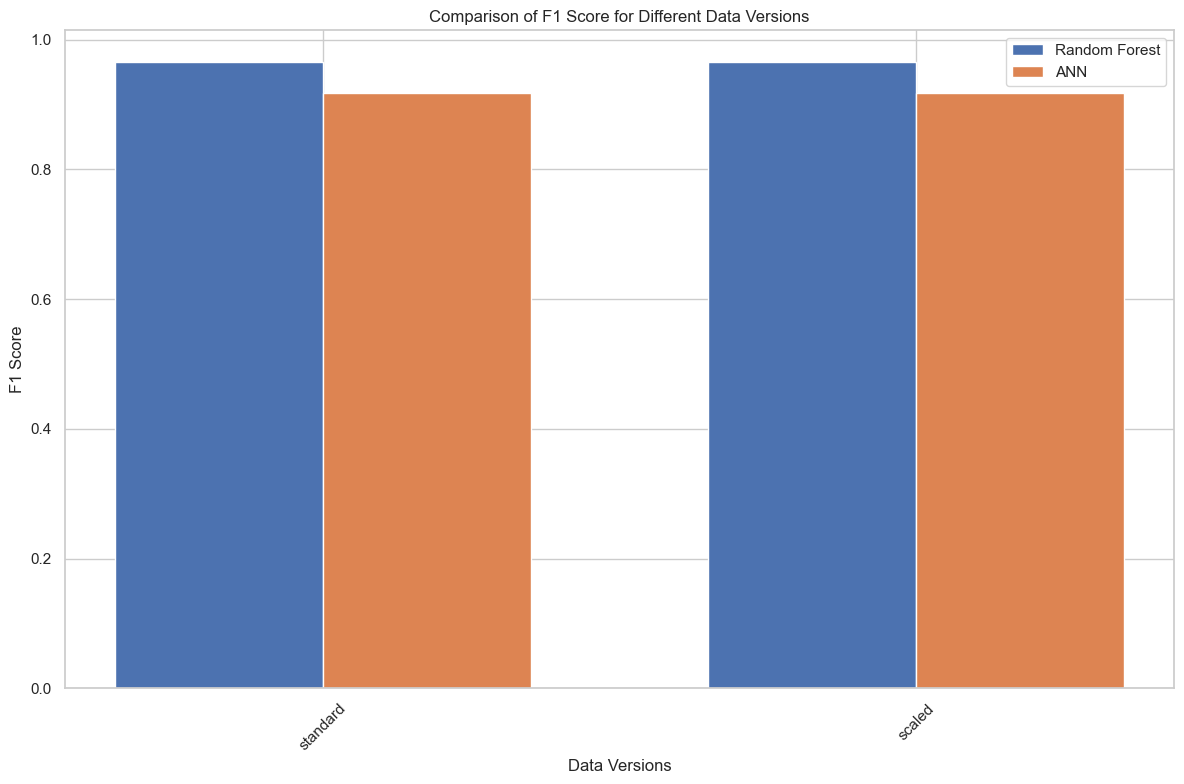

KeyError: 'RF'

In [57]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba=None, num_classes=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC Curve if probabilities are available
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_proba, pos_label=1)
        auc = roc_auc_score(y_true, y_proba, multi_class='ovo', average='macro')
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        metrics['AUC'] = auc

    return metrics

# Find best RF and ANN models based on accuracy
best_rf_version = max(results, key=lambda x: results[x]['RF']['accuracy'] if 'RF' in results[x] else -1)
best_ann_version = max(results, key=lambda x: results[x]['ANN']['accuracy'] if 'ANN' in results[x] else -1)

# Evaluate the best RF model on its corresponding dataset
best_rf_model = joblib.load(f'RF_best_model_{best_rf_version}.pkl')
X_test_rf = datasets[best_rf_version][1]
y_test_rf = datasets[best_rf_version][3]
y_pred_rf = best_rf_model.predict(X_test_rf)
rf_metrics = evaluate_model(y_test_rf, y_pred_rf)

# Evaluate the best ANN model on its corresponding dataset
best_ann_model = load_model(f'ANN_best_model_{best_ann_version}.h5')
X_test_ann = datasets[best_ann_version][1]
y_test_ann = datasets[best_ann_version][3]
y_test_ann_cat = to_categorical(y_test_ann, num_classes=num_classes)
y_pred_ann = best_ann_model.predict(X_test_ann)
y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)

ann_metrics = evaluate_model(
    y_test_ann, y_pred_ann_labels, 
    y_proba=y_pred_ann[:, 1] if num_classes == 2 else None
)

# Combine evaluation results
eval_results = {
    best_rf_version: {'RF': rf_metrics},
    best_ann_version: {'ANN': ann_metrics}
}

# Save evaluation results to JSON
with open('evaluation_results.json', 'w') as f:
    json.dump(eval_results, f)

# Plot performance comparison
def plot_performance_comparison(eval_results, metric_name):
    rf_scores = [eval_results[version]['RF'][metric_name] for version in eval_results if 'RF' in eval_results[version]]
    ann_scores = [eval_results[version]['ANN'][metric_name] for version in eval_results if 'ANN' in eval_results[version]]
    versions = list(eval_results.keys())

    x = np.arange(len(versions))
    width = 0.35

    plt.figure(figsize=(12, 8))
    plt.bar(x - width/2, rf_scores, width, label='Random Forest')
    plt.bar(x + width/2, ann_scores, width, label='ANN')

    plt.xlabel('Data Versions')
    plt.ylabel(metric_name)
    plt.title(f'Comparison of {metric_name} for Different Data Versions')
    plt.xticks(x, versions, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot comparison for each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']:
    if any(metric in eval_results[version]['RF'] for version in eval_results) or \
       any(metric in eval_results[version]['ANN'] for version in eval_results):
        plot_performance_comparison(eval_results, metric)

# Selection of the best preprocessing method
def select_best_preprocessing(eval_results, primary_metric='F1 Score'):
    best_version = None
    best_score = 0
    best_model_type = None
    best_params = None

    for version, result in eval_results.items():
        for model_type, metrics in result.items():
            if metrics.get(primary_metric, 0) > best_score:
                best_score = metrics[primary_metric]
                best_version = version
                best_model_type = model_type
                best_params = results[version][model_type]['params']

    print(f"Best preprocessing: {best_version}")
    print(f"Best model: {best_model_type}")
    print(f"Best {primary_metric}: {best_score}")
    print(f"Best parameters: {best_params}")

# Select the best preprocessing based on F1 Score
select_best_preprocessing(eval_results, primary_metric='F1 Score')


In [51]:
import numpy as np
import json
import joblib
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Create ANN model function with dynamic input shape
def create_ann_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning function
def hyperparameter_tuning(X_train, y_train, model_type, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    X_train = X_train.astype(np.float32)
    y_train = y_train.astype(np.int32)

    if model_type == "RF":
        params = {
            'n_estimators': [50],
            'max_depth': [10],
            'min_samples_split': [2]
        }
        rf_model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(
            rf_model, param_distributions=params, n_iter=1, 
            cv=kf, scoring='accuracy', n_jobs=-1
        )
        random_search_rf.fit(X_train, y_train)
        best_rf_model = random_search_rf.best_estimator_
        best_rf_params = random_search_rf.best_params_
        joblib.dump(best_rf_model, f'RF_best_model_{model_type}.pkl')  # Save model

        return best_rf_model, best_rf_params

    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        input_shape = X_train.shape[1]
        best_score = 0
        best_params = None

        param_grid = {
            'neurons': [16],
            'layers': [2],
            'epochs': [50],
            'batch_size': [20]
        }

        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_idx, test_idx in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
                            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

                            model = create_ann_model(neurons, layers, input_shape, num_classes)
                            model.fit(
                                X_train_fold, y_train_fold, 
                                epochs=epochs, batch_size=batch_size, verbose=0
                            )
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)

                        mean_score = np.mean(scores)
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {
                                'neurons': neurons, 
                                'layers': layers, 
                                'epochs': epochs, 
                                'batch_size': batch_size
                            }

        best_ann_model = create_ann_model(best_params['neurons'], best_params['layers'], input_shape, num_classes)
        best_ann_model.fit(X_train, y_train, 
                           epochs=best_params['epochs'], 
                           batch_size=best_params['batch_size'], 
                           verbose=0)
        best_ann_model.save(f'ANN_best_model_{model_type}.h5')  # Save model

        return best_ann_model, best_params

    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

# Define datasets as numpy arrays
datasets = {
    'standard': (X_train_std.values.astype(np.float32), X_test_std.values.astype(np.float32), y_train_std.values, y_test_std.values),
    'scaled': (X_train_scaled.astype(np.float32), X_test_scaled.astype(np.float32), y_train_scaled, y_test_scaled),
    'pca': (X_train_pca.astype(np.float32), X_test_pca.astype(np.float32), y_train_pca, y_test_pca),
    'binned': (X_train_binned.values.astype(np.float32), X_test_binned.values.astype(np.float32), y_train_binned.values, y_test_binned.values),
    'interaction': (X_train_inter.values.astype(np.float32), X_test_inter.values.astype(np.float32), y_train_inter.values, y_test_inter.values)
}

# Train models for each dataset
results = {}
num_classes = len(np.unique(y))

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    result = {'version': version}
    
    if version in ['standard', 'binned']:
        best_rf, best_rf_params = hyperparameter_tuning(X_train, y_train, "RF", num_classes)
        rf_accuracy = best_rf.score(X_test, y_test)
        result['RF'] = {'accuracy': rf_accuracy, 'params': best_rf_params}
    
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_ann_params = hyperparameter_tuning(X_train, y_train, "ANN", num_classes)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        ann_accuracy = best_ann.evaluate(X_test, y_test_cat, verbose=0)[1]
        result['ANN'] = {'accuracy': ann_accuracy, 'params': best_ann_params}
    
    results[version] = result

# Save results to JSON (without model objects)
serializable_results = {}
for version, result in results.items():
    serializable_results[version] = {}
    for model_type, metrics in result.items():
        if isinstance(metrics, dict):
            serializable_results[version][model_type] = {
                'accuracy': metrics['accuracy'],
                'params': metrics['params']
            }

with open('model_results.json', 'w') as f:
    json.dump(serializable_results, f)

# Display results
serializable_results


{'standard': {'RF': {'accuracy': 0.966903073286052,
   'params': {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}}},
 'scaled': {'ANN': {'accuracy': 0.9432623982429504,
   'params': {'neurons': 16, 'layers': 2, 'epochs': 50, 'batch_size': 20}}},
 'pca': {'ANN': {'accuracy': 0.7730496525764465,
   'params': {'neurons': 16, 'layers': 2, 'epochs': 50, 'batch_size': 20}}},
 'binned': {'RF': {'accuracy': 0.8865248226950354,
   'params': {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}}},
 'interaction': {'ANN': {'accuracy': 0.5910165309906006,
   'params': {'neurons': 16, 'layers': 2, 'epochs': 50, 'batch_size': 20}}}}

C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


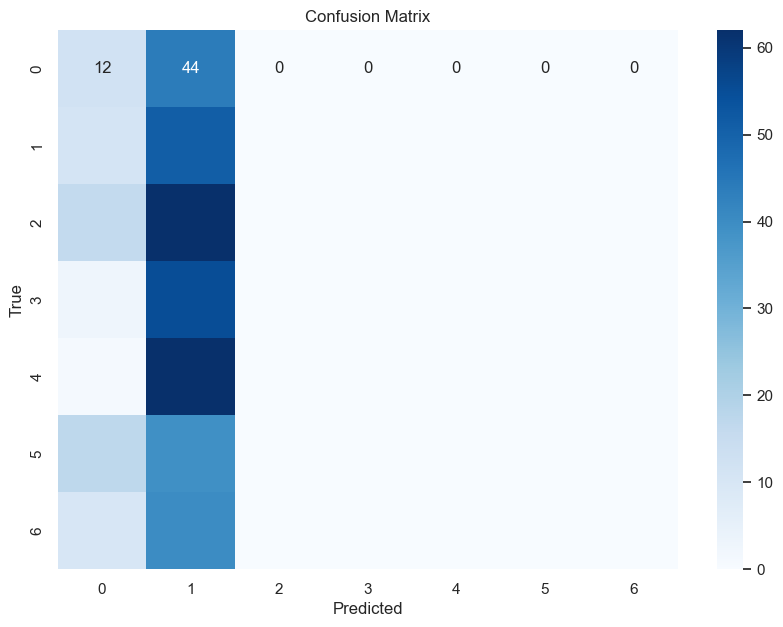

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208877F55A0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x00000208877F55A0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

ValueError: Input 0 of layer "sequential_486" is incompatible with the layer: expected shape=(None, 32), found shape=(None, 30)

In [55]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# 找到最佳模型和对应的数据集
def find_best_models(results):
    best_rf, best_ann = None, None
    best_rf_version, best_ann_version = None, None
    best_rf_score, best_ann_score = 0, 0

    for version, result in results.items():
        if 'RF' in result and result['RF']['accuracy'] > best_rf_score:
            best_rf = joblib.load(f'RF_best_model_RF.pkl')
            best_rf_version = version
            best_rf_score = result['RF']['accuracy']

        if 'ANN' in result and result['ANN']['accuracy'] > best_ann_score:
            best_ann = load_model(f'ANN_best_model_ANN.h5')
            best_ann_version = version
            best_ann_score = result['ANN']['accuracy']

    return (best_rf, best_rf_version), (best_ann, best_ann_version)

# 评估函数
def evaluate_model(y_true, y_pred, y_proba=None, num_classes=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # 绘制混淆矩阵
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # 绘制ROC曲线（如果有概率输出）
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_proba, pos_label=1)
        auc = roc_auc_score(y_true, y_proba, multi_class='ovo', average='macro')
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        metrics['AUC'] = auc

    return metrics

# 查找并评估最佳模型
(best_rf, best_rf_version), (best_ann, best_ann_version) = find_best_models(results)

eval_results = {}

# 对最佳随机森林模型进行评估
if best_rf is not None and best_rf_version is not None:
    X_test_rf = datasets[best_rf_version][1]
    y_test_rf = datasets[best_rf_version][3]

    y_pred_rf = best_rf.predict(X_test_rf)
    rf_metrics = evaluate_model(y_test_rf, y_pred_rf)
    eval_results['Best_RF'] = rf_metrics

# 对最佳神经网络模型进行评估
if best_ann is not None and best_ann_version is not None:
    X_test_ann = datasets[best_ann_version][1]
    y_test_ann = datasets[best_ann_version][3]
    y_test_cat_ann = to_categorical(y_test_ann, num_classes=num_classes)

    y_pred_ann = best_ann.predict(X_test_ann)
    y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)

    ann_metrics = evaluate_model(
        y_test_ann, y_pred_ann_labels, 
        y_proba=y_pred_ann[:, 1] if num_classes == 2 else None
    )
    eval_results['Best_ANN'] = ann_metrics

# 打印评估结果
print("Evaluation Results:")
for model, metrics in eval_results.items():
    print(f"\n{model} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# 保存评估结果到 JSON
with open('evaluation_results.json', 'w') as f:
    json.dump(eval_results, f)

# 绘制性能对比图
def plot_performance_comparison(eval_results):
    models = list(eval_results.keys())
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

    for metric in metrics:
        scores = [eval_results[model].get(metric, 0) for model in models]

        plt.figure(figsize=(10, 6))
        plt.bar(models, scores, color=['skyblue', 'orange'])
        plt.xlabel('Models')
        plt.ylabel(metric)
        plt.title(f'Comparison of {metric} for Best Models')
        plt.tight_layout()
        plt.show()

# 绘制比较图
plot_performance_comparison(eval_results)

# 根据F1分数选择最佳数据预处理方式和模型
def select_best_preprocessing(eval_results, primary_metric='F1 Score'):
    best_model = None
    best_score = 0

    for model, metrics in eval_results.items():
        if metrics.get(primary_metric, 0) > best_score:
            best_score = metrics[primary_metric]
            best_model = model

    print(f"\nBest model based on {primary_metric}: {best_model} with score: {best_score:.4f}")

# 选择最佳数据预处理和模型
select_best_preprocessing(eval_results, primary_metric='F1 Score')


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba=None, num_classes=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC Curve if probabilities are available
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_proba, pos_label=1)
        auc = roc_auc_score(y_true, y_proba, multi_class='ovo', average='macro')
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        metrics['AUC'] = auc

    return metrics

# Evaluate models for each dataset using the best models
eval_results = {}

for version, result in results.items():
    eval_results[version] = {}

    # Random Forest Evaluation
    if 'RF' in result:
        rf_model = result['RF']['model']
        X_test = datasets[version][1]
        y_test = datasets[version][3]

        y_pred_rf = rf_model.predict(X_test)
        rf_metrics = evaluate_model(y_test, y_pred_rf)
        eval_results[version]['RF'] = rf_metrics

    # ANN Evaluation
    if 'ANN' in result:
        ann_model = result['ANN']['model']
        X_test = datasets[version][1]
        y_test = datasets[version][3]

        y_pred_ann = ann_model.predict(X_test)
        y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)

        ann_metrics = evaluate_model(
            y_test, y_pred_ann_labels, 
            y_proba=y_pred_ann[:, 1] if num_classes == 2 else None
        )
        eval_results[version]['ANN'] = ann_metrics

# Save evaluation results to JSON
with open('evaluation_results.json', 'w') as f:
    json.dump(eval_results, f)

# Plot performance comparison
def plot_performance_comparison(eval_results, metric_name):
    rf_scores = [eval_results[version]['RF'][metric_name] for version in eval_results if 'RF' in eval_results[version]]
    ann_scores = [eval_results[version]['ANN'][metric_name] for version in eval_results if 'ANN' in eval_results[version]]
    versions = list(eval_results.keys())

    x = np.arange(len(versions))
    width = 0.35

    plt.figure(figsize=(12, 8))
    plt.bar(x - width/2, rf_scores, width, label='Random Forest')
    plt.bar(x + width/2, ann_scores, width, label='ANN')

    plt.xlabel('Data Versions')
    plt.ylabel(metric_name)
    plt.title(f'Comparison of {metric_name} for Different Data Versions')
    plt.xticks(x, versions, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot comparison for each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']:
    plot_performance_comparison(eval_results, metric)

# Selection of the best preprocessing method
def select_best_preprocessing(eval_results, primary_metric='F1 Score'):
    best_version = None
    best_score = 0
    best_model_type = None
    best_params = None

    for version, result in eval_results.items():
        for model_type, metrics in result.items():
            if metrics.get(primary_metric, 0) > best_score:
                best_score = metrics[primary_metric]
                best_version = version
                best_model_type = model_type
                best_params = results[version][model_type]['params']

    print(f"Best preprocessing: {best_version}")
    print(f"Best model: {best_model_type}")
    print(f"Best {primary_metric}: {best_score}")
    print(f"Best parameters: {best_params}")

# Select the best preprocessing based on F1 Score
select_best_preprocessing(eval_results, primary_metric='F1 Score')



KeyError: 'model'

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba=None, num_classes=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC Curve if probabilities are available
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        auc = roc_auc_score(y_true, y_proba, multi_class='ovo', average='macro')
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        metrics['AUC'] = auc

    return metrics

# Evaluate models for each dataset
eval_results = {}

for version, result in results.items():
    eval_results[version] = {}

    # Random Forest Evaluation
    if 'RF' in result:
        y_pred_rf = result['RF']['model'].predict(datasets[version][1])
        rf_metrics = evaluate_model(datasets[version][3], y_pred_rf, num_classes=num_classes)
        eval_results[version]['RF'] = rf_metrics

    # ANN Evaluation
    if 'ANN' in result:
        y_pred_ann = result['ANN']['model'].predict(datasets[version][1])
        y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)
        y_test_cat = to_categorical(datasets[version][3], num_classes=num_classes)
        ann_metrics = evaluate_model(datasets[version][3], y_pred_ann_labels, y_pred_ann[:, 1], num_classes=num_classes)
        eval_results[version]['ANN'] = ann_metrics

# Save evaluation results to JSON
with open('evaluation_results.json', 'w') as f:
    json.dump(eval_results, f)

# Plot performance comparison
def plot_performance_comparison(eval_results, metric_name):
    rf_scores = [eval_results[version]['RF'][metric_name] for version in eval_results if 'RF' in eval_results[version]]
    ann_scores = [eval_results[version]['ANN'][metric_name] for version in eval_results if 'ANN' in eval_results[version]]
    versions = list(eval_results.keys())

    x = np.arange(len(versions))
    width = 0.35

    plt.figure(figsize=(12, 8))
    plt.bar(x - width/2, rf_scores, width, label='Random Forest')
    plt.bar(x + width/2, ann_scores, width, label='ANN')

    plt.xlabel('Data Versions')
    plt.ylabel(metric_name)
    plt.title(f'Comparison of {metric_name} for Different Data Versions')
    plt.xticks(x, versions, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot comparison for each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']:
    plot_performance_comparison(eval_results, metric)

# Selection of the best preprocessing method
def select_best_preprocessing(eval_results, primary_metric='F1 Score'):
    best_version = None
    best_score = 0
    best_model_type = None
    best_params = None

    for version, result in eval_results.items():
        for model_type, metrics in result.items():
            if metrics[primary_metric] > best_score:
                best_score = metrics[primary_metric]
                best_version = version
                best_model_type = model_type
                best_params = results[version][model_type]['params']

    print(f"Best preprocessing: {best_version}")
    print(f"Best model: {best_model_type}")
    print(f"Best {primary_metric}: {best_score}")
    print(f"Best parameters: {best_params}")

# Select the best preprocessing based on F1 Score
select_best_preprocessing(eval_results, primary_metric='F1 Score')


KeyError: 'model'

In [47]:
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba=None, num_classes=None):
    """
    Evaluate the model using various metrics.
    
    Args:
        y_true (np.array): True labels.
        y_pred (np.array): Predicted labels.
        y_proba (np.array): Predicted probabilities (if available).
        num_classes (int): Number of classes for classification.

    Returns:
        metrics (dict): Dictionary of evaluation metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot AUC-ROC curve if probabilities are available
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_proba, pos_label=1)
        auc = roc_auc_score(y_true, y_proba, multi_class='ovo', average='macro')

        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        metrics['AUC'] = auc

    return metrics

# Evaluate models for each dataset
eval_results = {}

for version, result in results.items():
    eval_results[version] = {}

    # Random Forest Evaluation
    if 'RF' in result:
        y_pred_rf = result['RF']['model'].predict(datasets[version][1])
        rf_metrics = evaluate_model(datasets[version][3], y_pred_rf, num_classes=num_classes)
        eval_results[version]['RF'] = rf_metrics

    # ANN Evaluation
    if 'ANN' in result:
        y_pred_ann = result['ANN']['model'].predict(datasets[version][1])
        y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)
        y_test_cat = to_categorical(datasets[version][3], num_classes=num_classes)
        ann_metrics = evaluate_model(datasets[version][3], y_pred_ann_labels, y_pred_ann[:, 1], num_classes=num_classes)
        eval_results[version]['ANN'] = ann_metrics

# Save evaluation results to JSON
with open('evaluation_results.json', 'w') as f:
    json.dump(eval_results, f)

# Display evaluation results
eval_results

# Plot performance comparison
def plot_performance_comparison(eval_results):
    """
    Plot performance comparison across different datasets and models.
    """
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
    models = ['RF', 'ANN']
    
    for metric in metrics:
        plt.figure(figsize=(12, 8))
        for model in models:
            values = [eval_results[version][model].get(metric, 0) for version in eval_results if model in eval_results[version]]
            plt.plot(eval_results.keys(), values, label=model)
        
        plt.xlabel('Data Version')
        plt.ylabel(metric)
        plt.title(f'Comparison of {metric} Across Models and Data Versions')
        plt.legend()
        plt.show()

# Call function to plot comparison
plot_performance_comparison(eval_results)

KeyError: 'model'

In [48]:
import numpy as np
import json
import joblib
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical

# Create ANN model function
def create_ann_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning function
def hyperparameter_tuning(X_train, y_train, model_type, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    if model_type == "RF":
        # params = {
        #     'n_estimators': [50, 100, 200],
        #     'max_depth': [None, 10, 20],
        #     'min_samples_split': [2, 5]
        # }
        params = {
            'n_estimators': [50],
            'max_depth': [10],
            'min_samples_split': [2]
        }
        rf_model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=5, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_rf_model = random_search_rf.best_estimator_
        best_rf_params = random_search_rf.best_params_
        joblib.dump(best_rf_model, f'RF_best_model_{model_type}.pkl')

        return best_rf_model, best_rf_params

    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        best_score = 0
        best_params = None
        # param_grid = {
        #     'neurons': [16, 32],
        #     'layers': [1, 2],
        #     'epochs': [50, 100],
        #     'batch_size': [10, 20]
        # }
        param_grid = {
            'neurons': [16],
            'layers': [2],
            'epochs': [50],
            'batch_size': [20]
        }


        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_idx, test_idx in kf.split(X_train):
                            # Use normal indexing
                            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
                            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]
                            model = create_ann_model(neurons, layers, X_train.shape[1], num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}

        best_ann_model = create_ann_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes)
        best_ann_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
        best_ann_model.save(f'ANN_best_model_{model_type}.h5')

        return best_ann_model, best_params

    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

# Define datasets
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (X_train_pca, X_test_pca, y_train_pca, y_test_pca),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

# Train models for each dataset
results = {}
num_classes = len(np.unique(y))

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    result = {'version': version}
    
    if version in ['standard', 'binned']:
        best_rf, best_rf_params = hyperparameter_tuning(X_train, y_train, "RF", num_classes)
        rf_accuracy = best_rf.score(X_test, y_test)
        result['RF'] = {'accuracy': rf_accuracy, 'params': best_rf_params, 'model': best_rf}
    
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_ann_params = hyperparameter_tuning(X_train, y_train, "ANN", num_classes)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        ann_accuracy = best_ann.evaluate(X_test, y_test_cat, verbose=0)[1]
        result['ANN'] = {'accuracy': ann_accuracy, 'params': best_ann_params, 'model': best_ann}
    
    results[version] = result

# Save results to JSON
with open('model_results.json', 'w') as f:
    json.dump(results, f)

# Display results
results

C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyError: "None of [Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n       ...\n       1677, 1678, 1679, 1680, 1681, 1683, 1684, 1685, 1686, 1687],\n      dtype='int32', length=1350)] are in the [columns]"

In [42]:
import numpy as np
import json
import joblib
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical

# Create ANN model function
def create_ann_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning function
def hyperparameter_tuning(X_train, y_train, model_type, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    if model_type == "RF":
        # params = {
        #     'n_estimators': [50, 100, 200],
        #     'max_depth': [None, 10, 20],
        #     'min_samples_split': [2, 5]
        # }
        params = {
            'n_estimators': [50],
            'max_depth': [10],
            'min_samples_split': [2]
        }
        rf_model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=5, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_rf_model = random_search_rf.best_estimator_
        best_rf_params = random_search_rf.best_params_
        joblib.dump(best_rf_model, f'RF_best_model_{model_type}.pkl')

        return best_rf_model, best_rf_params

    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        best_score = 0
        best_params = None
        # param_grid = {
        #     'neurons': [16, 32],
        #     'layers': [1, 2],
        #     'epochs': [50, 100],
        #     'batch_size': [10, 20]
        # }
        param_grid = {
            'neurons': [16],
            'layers': [2],
            'epochs': [50],
            'batch_size': [20]
        }

        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_idx, test_idx in kf.split(X_train):
                            # Use iloc for row-based indexing
                            X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
                            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]
                            
                            model = create_ann_model(neurons, layers, X_train.shape[1], num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}

        best_ann_model = create_ann_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes)
        best_ann_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
        best_ann_model.save(f'ANN_best_model_{model_type}.h5')

        return best_ann_model, best_params

    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

# Define datasets
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (X_train_pca, X_test_pca, y_train_pca, y_test_pca),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

# Train models for each dataset
results = {}
num_classes = len(np.unique(y))

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    result = {'version': version}
    
    # if version in ['standard', 'binned']:
    #     best_rf, best_rf_params = hyperparameter_tuning(X_train, y_train, "RF", num_classes)
    #     rf_accuracy = best_rf.score(X_test, y_test)
    #     result['RF'] = {'accuracy': rf_accuracy, 'params': best_rf_params}
    
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_ann_params = hyperparameter_tuning(X_train, y_train, "ANN", num_classes)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        ann_accuracy = best_ann.evaluate(X_test, y_test_cat, verbose=0)[1]
        result['ANN'] = {'accuracy': ann_accuracy, 'params': best_ann_params}
    
    results[version] = result

# Save results to JSON
with open('model_results.json', 'w') as f:
    json.dump(results, f)

# Display results
results


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [41]:
import numpy as np
import json
import joblib
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical

# Create ANN model function
def create_ann_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning function
def hyperparameter_tuning(X_train, y_train, model_type, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        rf_model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=5, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_rf_model = random_search_rf.best_estimator_
        best_rf_params = random_search_rf.best_params_
        joblib.dump(best_rf_model, f'RF_best_model_{model_type}.pkl')

        return best_rf_model, best_rf_params

    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        best_score = 0
        best_params = None
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }

        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_idx, test_idx in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
                            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]
                            model = create_ann_model(neurons, layers, X_train.shape[1], num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}

        best_ann_model = create_ann_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes)
        best_ann_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
        best_ann_model.save(f'ANN_best_model_{model_type}.h5')

        return best_ann_model, best_params

    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

# Define datasets
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (X_train_pca, X_test_pca, y_train_pca, y_test_pca),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

# Train models for each dataset
results = {}
num_classes = len(np.unique(y))

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    result = {'version': version}
    
    if version in ['standard', 'binned']:
        best_rf, best_rf_params = hyperparameter_tuning(X_train, y_train, "RF", num_classes)
        rf_accuracy = best_rf.score(X_test, y_test)
        result['RF'] = {'accuracy': rf_accuracy, 'params': best_rf_params}
    
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_ann_params = hyperparameter_tuning(X_train, y_train, "ANN", num_classes)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        ann_accuracy = best_ann.evaluate(X_test, y_test_cat, verbose=0)[1]
        result['ANN'] = {'accuracy': ann_accuracy, 'params': best_ann_params}
    
    results[version] = result

# Save results to JSON
with open('model_results.json', 'w') as f:
    json.dump(results, f)

# Display results
results


KeyError: "None of [Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n       ...\n       1677, 1678, 1679, 1680, 1681, 1683, 1684, 1685, 1686, 1687],\n      dtype='int32', length=1350)] are in the [columns]"

In [ ]:
import numpy as np
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc

# Function to calculate evaluation metrics and save to JSON
def evaluate_model(y_test, y_pred, y_score, model_name, data_version):
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # AUC-ROC (Multiclass)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    if y_score.shape[1] == y_test_bin.shape[1]:  # Ensure the number of classes match
        auc_roc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovo')
    else:
        auc_roc = None
    
    # Save metrics to JSON
    eval_results = {
        'model_name': model_name,
        'data_version': data_version,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix.tolist(),
        'auc_roc': auc_roc
    }
    
    with open(f'evaluation_results_{model_name}_{data_version}.json', 'w') as f:
        json.dump(eval_results, f)
    
    return eval_results

# Plot Confusion Matrix
def plot_confusion(conf_matrix, model_name, data_version):
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {model_name} on {data_version}')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f'confusion_matrix_{model_name}_{data_version}.png')
    plt.show()

# Plot AUC-ROC Curve
def plot_roc_curve(y_test, y_score, model_name, data_version):
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    plt.figure()
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'AUC-ROC: {model_name} on {data_version}')
    plt.legend(loc='lower right')
    plt.savefig(f'roc_curve_{model_name}_{data_version}.png')
    plt.show()

# Iterate through datasets and models for evaluation
for version, (X_train, X_test, y_train, y_test) in datasets.items():
    # Evaluate Random Forest Model
    if 'best_rf' in locals():
        y_pred_rf = best_rf.predict(X_test)
        y_score_rf = best_rf.predict_proba(X_test)
        rf_eval = evaluate_model(y_test, y_pred_rf, y_score_rf, 'RandomForest', version)
        plot_confusion(rf_eval['confusion_matrix'], 'RandomForest', version)
        if rf_eval['auc_roc']:
            plot_roc_curve(y_test, y_score_rf, 'RandomForest', version)

    # Evaluate ANN Model
    if 'best_ann' in locals():
        y_pred_ann = best_ann.predict_classes(X_test)
        y_score_ann = best_ann.predict_proba(X_test)
        ann_eval = evaluate_model(y_test, y_pred_ann, y_score_ann, 'ANN', version)
        plot_confusion(ann_eval['confusion_matrix'], 'ANN', version)
        if ann_eval['auc_roc']:
            plot_roc_curve(y_test, y_score_ann, 'ANN', version)

    # Evaluate Voting Ensemble Model
    if 'voting_clf' in locals():
        y_pred_voting = voting_clf.predict(X_test)
        y_score_voting = voting_clf.predict_proba(X_test)
        voting_eval = evaluate_model(y_test, y_pred_voting, y_score_voting, 'VotingEnsemble', version)
        plot_confusion(voting_eval['confusion_matrix'], 'VotingEnsemble', version)
        if voting_eval['auc_roc']:
            plot_roc_curve(y_test, y_score_voting, 'VotingEnsemble', version)

# Compare Results and Determine Optimal Data Processing Method
def compare_and_select_best(results_files):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    best_model = None
    best_score = 0
    for file in results_files:
        with open(file, 'r') as f:
            result = json.load(f)
            score = np.mean([result[metric] for metric in metrics])
            if score > best_score:
                best_score = score
                best_model = result
    
    print(f"Best model for raw data is {best_model['model_name']} using {best_model['data_version']} with score: {best_score}")
    with open('best_model_summary.json', 'w') as f:
        json.dump(best_model, f)

# Call function with list of evaluation files
results_files = ['evaluation_results_RandomForest_standard.json', 'evaluation_results_ANN_scaled.json', 'evaluation_results_VotingEnsemble_pca.json', ...]  # add all generated evaluation result files here
compare_and_select_best(results_files)


In [39]:
import numpy as np
import joblib
import json
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Callback to monitor memory usage
class MemoryCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        process = psutil.Process(os.getpid())
        print(f"Memory usage at epoch {epoch}: {process.memory_info().rss / 1024 ** 2:.2f} MB")

# Create ANN model
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=input_shape))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning function
# 对超参数调优函数的结果处理进行调整
def hyperparameter_tuning(X_train, y_train, model_type, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    if model_type == "RF":
        params = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        grid_search = GridSearchCV(model, params, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        results = {
            'best_score': grid_search.best_score_,
            'best_params': best_params,
            'cv_results': {k: v.tolist() for k, v in grid_search.cv_results_.items() if isinstance(v, np.ndarray)}
        }
    elif model_type == "ANN":
        # 处理 ANN 模型
        model = KerasClassifier(build_fn=lambda: create_model(16, 2, X_train.shape[1], num_classes), epochs=50, batch_size=10, verbose=0)
        param_grid = {'neurons': [16, 32], 'layers': [1, 2]}
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, to_categorical(y_train, num_classes=num_classes))
        best_model = grid_search.best_estimator_.model
        best_params = grid_search.best_params_
        results = {
            'best_score': grid_search.best_score_,
            'best_params': best_params,
            'cv_results': {k: v.tolist() for k, v in grid_search.cv_results_.items() if isinstance(v, np.ndarray)}
        }

    # 保存最佳模型
    model_path = f'{model_type}_best_model.pkl' if model_type != "ANN" else f'{model_type}_best_model.h5'
    if model_type == "ANN":
        best_model.save(model_path)
    else:
        joblib.dump(best_model, model_path)

    # 保存调优结果
    result_json_path = f'{model_type}_results.json'
    with open(result_json_path, 'w') as f:
        json.dump(results, f)

    return best_model, best_params


# Example of applying models on datasets
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

num_classes = 7  # Update this based on the actual number of target classes
models = {}

for model_type in ['RF', 'ANN']:
    for version, (X_train, X_test, y_train, y_test) in datasets.items():
        model, params = hyperparameter_tuning(X_train, y_train, model_type, num_classes)
        models[f'{model_type}_{version}'] = model


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


ValueError: not enough values to unpack (expected 4, got 2)

In [37]:
import numpy as np
import pandas as pd
import joblib
import json
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Custom callback for monitoring memory usage
class MemoryCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        import os, psutil
        process = psutil.Process(os.getpid())
        print(f'Memory usage at epoch {epoch}: {process.memory_info().rss / 1024 ** 2:.2f} MB')

# Create and compile ANN model
def create_ann_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to perform hyperparameter tuning
def hyperparameter_tuning(X_train, y_train, model_type, config):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    if model_type == "RF":
        model = RandomForestClassifier(random_state=42)
        grid_search = GridSearchCV(model, param_grid=config['params'], cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_type == "ANN":
        model = KerasClassifier(build_fn=create_ann_model, epochs=50, batch_size=10, verbose=0)
        grid_search = GridSearchCV(model, param_grid=config['params'], cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_.model
    
    results = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
    return best_model, results

# Prepare and fit models on different datasets
def train_models_on_datasets(datasets, num_classes):
    model_configs = {
        'RF': {'params': {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}},
        'ANN': {'params': {'neurons': [16, 32], 'layers': [1, 2], 'input_shape': [datasets['standard'][0].shape[1]], 'num_classes': [num_classes]}}
    }
    best_models = {}
    performance_records = {}

    for version, data in datasets.items():
        X_train, X_test, y_train, y_test = data
        for model_type in ['RF', 'ANN']:
            best_model, results = hyperparameter_tuning(X_train, y_train, model_type, model_configs[model_type])
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            performance_records[f'{model_type}_{version}'] = {
                'accuracy': accuracy,
                'best_params': results['best_params']
            }
            best_models[f'{model_type}_{version}'] = best_model
            # Save best model and results
            if model_type == 'ANN':
                best_model.save(f'{model_type}_{version}_best_model.h5')
            else:
                joblib.dump(best_model, f'{model_type}_{version}_best_model.pkl')
    
    with open('model_performance_records.json', 'w') as f:
        json.dump(performance_records, f)

    return best_models, performance_records

# Example usage
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}
num_classes = 7  # Adjust based on the actual number of classes in your dataset
best_models, records = train_models_on_datasets(datasets, num_classes)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [32]:
import numpy as np
import json
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# 创建ANN模型的函数
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 超参数调优函数，返回最佳模型和参数
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
                            model = create_model(neurons, layers, X_train.shape[1], num_classes)
                            ann_wrapper = KerasClassifier(model=model, epochs=epochs, batch_size=batch_size, verbose=0)
                            ann_wrapper.fit(X_train_fold, y_train_fold)
                            score = ann_wrapper.score(X_test_fold, y_test_fold)
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}
        best_model = KerasClassifier(model=lambda: create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes), epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
        best_model.fit(X_train, y_train)

    return best_model, best_params

# 集成模型
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    # 创建投票分类器
    voting_clf = VotingClassifier(
        estimators=[('rf', best_rf), ('ann', best_ann)],
        voting='soft'
    )
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# 运行不同版本的数据集
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)


ValueError: The estimator Sequential should be a classifier.

In [31]:
import numpy as np
import json
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# 创建ANN模型的函数
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 超参数调优函数，返回最佳模型和参数
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
                            model = KerasClassifier(model=create_model, model__neurons=neurons, model__layers=layers, model__input_shape=X_train.shape[1], model__num_classes=num_classes, epochs=epochs, batch_size=batch_size, verbose=0)
                            model.fit(X_train_fold, y_train_fold)
                            score = model.score(X_test_fold, y_test_fold)
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}
        best_model = KerasClassifier(model=create_model, model__neurons=best_params['neurons'], model__layers=best_params['layers'], model__input_shape=X_train.shape[1], model__num_classes=num_classes, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
        best_model.fit(X_train, y_train)

    return best_model, best_params

# 集成模型
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    voting_clf = VotingClassifier(estimators=[('rf', best_rf), ('ann', best_ann)], voting='soft')
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# 运行不同版本的数据集
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)


ValueError: The estimator Sequential should be a classifier.

In [30]:
import numpy as np
import json
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# 创建ANN模型的函数
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def model_builder(neurons, layers, input_shape, num_classes):
    return lambda: create_model(neurons, layers, input_shape, num_classes)

# 超参数调优函数，返回最佳模型和参数
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
        
    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layer_count in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                            ann_model = KerasClassifier(model=model_builder(neurons, layer_count, X_train.shape[1], num_classes),
                                                        epochs=epochs, batch_size=batch_size, verbose=0)
                            ann_model.fit(X_train_fold, y_train_fold)
                            score = ann_model.score(X_test_fold, y_test_fold)
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layer_count, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layer_count, 'epochs': epochs, 'batch_size': batch_size}
        if best_params:
            best_model = KerasClassifier(
                model=model_builder(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes),
                epochs=best_params['epochs'],
                batch_size=best_params['batch_size'],
                verbose=0
            )
            best_model.fit(X_train, y_train)

    return best_model, best_params

# 集成模型
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    # 创建投票分类器
    voting_clf = VotingClassifier(
        estimators=[('rf', best_rf), ('ann', best_ann)],
        voting='soft'
    )
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# 运行不同版本的数据集
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    # 集成模型
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)


ValueError: The estimator Sequential should be a classifier.

In [29]:
import numpy as np
import json
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# 创建ANN模型的函数
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 超参数调优函数，返回最佳模型和参数
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
        
    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                            model = create_model(neurons=neurons, layers=layers, input_shape=X_train.shape[1], num_classes=num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}
        
        # 使用Sci-Keras的KerasClassifier包装最佳模型
        best_model = KerasClassifier(
            model=create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes),
            epochs=best_params['epochs'],
            batch_size=best_params['batch_size'],
            verbose=0
        )
        best_model.fit(X_train, y_train)
        
    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

    return best_model, best_params

# 集成模型
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    # 创建投票分类器
    voting_clf = VotingClassifier(
        estimators=[('rf', best_rf), ('ann', best_ann)],
        voting='soft'
    )
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# 运行不同版本的数据集
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    # 集成模型
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)


ValueError: The estimator Sequential should be a classifier.

In [28]:
import numpy as np
import json
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# 创建ANN模型的函数
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 超参数调优函数，返回最佳模型和参数
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
        
    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                            model = create_model(neurons=neurons, layers=layers, input_shape=X_train.shape[1], num_classes=num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}
        
        # 使用Sci-Keras的KerasClassifier包装最佳模型
        best_model = KerasClassifier(
            model=create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes),
            epochs=best_params['epochs'],
            batch_size=best_params['batch_size'],
            verbose=0
        )
        best_model.fit(X_train, y_train)
        
    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

    # 返回最佳模型和参数
    return best_model, best_params

# 集成模型
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    # 将ANN模型用KerasClassifier包装
    best_ann = KerasClassifier(model=best_ann.model, epochs=best_ann.epochs, batch_size=best_ann.batch_size, verbose=0)
    
    # 创建投票分类器
    voting_clf = VotingClassifier(
        estimators=[('rf', best_rf), ('ann', best_ann)],
        voting='soft'
    )
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# 运行不同版本的数据集
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    # 集成模型
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)


AttributeError: 'Sequential' object has no attribute 'model'

In [27]:
import numpy as np
import json
import os
import psutil
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scikeras.wrappers import KerasClassifier  # 使用Sci-Keras包装器
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# 自定义Callback以跟踪内存使用情况
class MemoryCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        process = psutil.Process(os.getpid())
        print(f"Memory usage at epoch {epoch}: {process.memory_info().rss / 1024 ** 2:.2f} MB")

# 创建ANN模型的函数
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 超参数调优函数，返回最佳模型和参数
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
        
    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                            model = create_model(neurons=neurons, layers=layers, input_shape=X_train.shape[1], num_classes=num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}
        
        # 使用Sci-Keras的KerasClassifier包装最佳模型
        best_model = KerasClassifier(
            model=create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes),
            epochs=best_params['epochs'],
            batch_size=best_params['batch_size'],
            verbose=0
        )
        best_model.fit(X_train, y_train)
        
        # 保存模型
        best_model.model.save(f'ANN_best_model_{result_file}.h5')
        
    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

    # 保存结果和最佳参数
    result_json_path = f'{model_type}_cv_results_{result_file}.json'
    for key in results.keys():
        if isinstance(results[key], np.ndarray):
            results[key] = results[key].tolist()
    summary = {
        'model_type': model_type,
        'data_version': result_file,
        'best_params': best_params,
        'results': results
    }
    with open(result_json_path, 'w') as f:
        json.dump(summary, f)
    return best_model, best_params

# 对特征缩放后的数据进行PCA
def apply_pca(X_train, X_test, n_components=10):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# 集成模型
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    # 使用Sci-Keras包装器
    voting_clf = VotingClassifier(
        estimators=[('rf', best_rf), ('ann', best_ann)],
        voting='soft'
    )
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# 运行不同版本的数据集
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    # 集成模型
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)


ValueError: The estimator Sequential should be a classifier.

In [26]:
import numpy as np
import json
import os
import psutil
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scikeras.wrappers import KerasClassifier  # 使用Sci-Keras包装器
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# 自定义Callback以跟踪内存使用情况
class MemoryCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        process = psutil.Process(os.getpid())
        print(f"Memory usage at epoch {epoch}: {process.memory_info().rss / 1024 ** 2:.2f} MB")

# 创建ANN模型的函数
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 超参数调优函数，返回最佳模型和参数
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
        
    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                            model = create_model(neurons=neurons, layers=layers, input_shape=X_train.shape[1], num_classes=num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}
        best_model = create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes)
        best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
        best_model.save(f'ANN_best_model_{result_file}.h5')  # 用Keras保存模型
        
    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

    # 保存结果和最佳参数
    result_json_path = f'{model_type}_cv_results_{result_file}.json'
    for key in results.keys():
        if isinstance(results[key], np.ndarray):
            results[key] = results[key].tolist()
    summary = {
        'model_type': model_type,
        'data_version': result_file,
        'best_params': best_params,
        'results': results
    }
    with open(result_json_path, 'w') as f:
        json.dump(summary, f)
    return best_model, best_params

# 对特征缩放后的数据进行PCA
def apply_pca(X_train, X_test, n_components=10):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# 集成模型
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    best_ann = KerasClassifier(build_fn=lambda: best_ann, 
                               epochs=100, batch_size=10, verbose=0)
    
    voting_clf = VotingClassifier(estimators=[('rf', best_rf), ('ann', best_ann)], voting='soft')
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# 运行不同版本的数据集
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    # 集成模型
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)

C:\Users\zwq\anaconda3\envs\Lab_tensorflow\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


AttributeError: 'KerasClassifier' object has no attribute 'compiled'

In [22]:
import numpy as np
import joblib
import json
import os
import psutil
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# 自定义Callback以跟踪内存使用情况
class MemoryCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        process = psutil.Process(os.getpid())
        print(f"Memory usage at epoch {epoch}: {process.memory_info().rss / 1024 ** 2:.2f} MB")

# 创建ANN模型的函数
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 超参数调优函数，返回最佳模型和参数
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
        joblib.dump(best_model, f'RF_best_model_{result_file}.pkl')

    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                            model = create_model(neurons=neurons, layers=layers, input_shape=X_train.shape[1], num_classes=num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}
        best_model = KerasClassifier(build_fn=lambda: create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes), 
                                     epochs=best_params['epochs'], 
                                     batch_size=best_params['batch_size'], 
                                     verbose=0)
        best_model.fit(X_train, y_train)
        joblib.dump(best_model, f'ANN_best_model_{result_file}.pkl')
        
    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

    # 保存结果和最佳参数
    result_json_path = f'{model_type}_cv_results_{result_file}.json'
    for key in results.keys():
        if isinstance(results[key], np.ndarray):
            results[key] = results[key].tolist()
    summary = {
        'model_type': model_type,
        'data_version': result_file,
        'best_params': best_params,
        'results': results
    }
    with open(result_json_path, 'w') as f:
        json.dump(summary, f)
    return best_model, best_params

# 对特征缩放后的数据进行PCA
def apply_pca(X_train, X_test, n_components=10):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# 集成模型
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    # 将ANN包装为KerasClassifier
    best_ann = KerasClassifier(build_fn=lambda: best_ann.model, 
                               epochs=best_ann.get_params()['epochs'], 
                               batch_size=best_ann.get_params()['batch_size'], 
                               verbose=0)
    
    # 创建VotingClassifier
    voting_clf = VotingClassifier(estimators=[('rf', best_rf), ('ann', best_ann)], voting='soft')
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# 运行不同版本的数据集
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    # 集成模型
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)


C:\Users\zwq\AppData\Local\Temp\ipykernel_42756\2108290295.py:84: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_model = KerasClassifier(build_fn=lambda: create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes),


PicklingError: Can't pickle <function hyperparameter_tuning.<locals>.<lambda> at 0x00000207F25DACB0>: it's not found as __main__.hyperparameter_tuning.<locals>.<lambda>

In [ ]:
# 模型性能的评估

In [ ]:
import numpy as np
import joblib
import json
import os
import psutil
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# Custom Callback to track memory usage
class MemoryCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        process = psutil.Process(os.getpid())
        print(f"Memory usage at epoch {epoch}: {process.memory_info().rss / 1024 ** 2:.2f} MB")

# Function to create ANN model
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to perform hyperparameter tuning and return best model and parameters
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
        joblib.dump(best_model, f'RF_best_model_{result_file}.pkl')

    elif model_type == "ANN":
        # Convert y_train to one-hot encoded format
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                            model = create_model(neurons=neurons, layers=layers, input_shape=X_train.shape[1], num_classes=num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}
        best_model = create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes)
        best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
        model_save_path = f'ANN_best_model_{result_file}.h5'
        best_model.save(model_save_path)
        
    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

    # Save results and best parameters
    result_json_path = f'{model_type}_cv_results_{result_file}.json'
    for key in results.keys():
        if isinstance(results[key], np.ndarray):
            results[key] = results[key].tolist()
    summary = {
        'model_type': model_type,
        'data_version': result_file,
        'best_params': best_params,
        'results': results
    }
    with open(result_json_path, 'w') as f:
        json.dump(summary, f)
    return best_model, best_params


# Apply PCA on scaled data for ANN
def apply_pca(X_train, X_test, n_components=10):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# Voting Ensemble for final integrated model
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    voting_clf = VotingClassifier(estimators=[('rf', best_rf), ('ann', best_ann)], voting='soft')
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# Example usage on different dataset versions
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (apply_pca(X_train_scaled, X_test_scaled)),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    # Ensemble Model
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)

In [ ]:
import numpy as np
import joblib
import json
import os
import psutil
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

# Custom Callback to track memory usage
class MemoryCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        process = psutil.Process(os.getpid())
        print(f"Memory usage at epoch {epoch}: {process.memory_info().rss / 1024 ** 2:.2f} MB")

# Function to create ANN model
def create_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to perform hyperparameter tuning and return best model and parameters
def hyperparameter_tuning(X_train, y_train, model_type, result_file, num_classes):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    y_train = np.array(y_train)

    if model_type == "RF":
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
        random_search_rf.fit(X_train, y_train)
        best_model = random_search_rf.best_estimator_
        best_params = random_search_rf.best_params_
        results = random_search_rf.cv_results_
        joblib.dump(best_model, f'RF_best_model_{result_file}.pkl')

    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        
        best_score = 0
        best_params = None
        results['mean_test_score'] = []
        results['params'] = []
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_index, test_index in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                            model = create_model(neurons=neurons, layers=layers, input_shape=X_train.shape[1], num_classes=num_classes)
                            model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)
                        mean_score = np.mean(scores)
                        results['mean_test_score'].append(mean_score)
                        results['params'].append({'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size})
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'neurons': neurons, 'layers': layers, 'epochs': epochs, 'batch_size': batch_size}
        best_model = KerasClassifier(build_fn=lambda: create_model(best_params['neurons'], best_params['layers'], X_train.shape[1], num_classes), 
                                     epochs=best_params['epochs'], 
                                     batch_size=best_params['batch_size'], 
                                     verbose=0)
        best_model.fit(X_train, y_train)
        joblib.dump(best_model, f'ANN_best_model_{result_file}.pkl')
        
    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

    # Save results and best parameters
    result_json_path = f'{model_type}_cv_results_{result_file}.json'
    for key in results.keys():
        if isinstance(results[key], np.ndarray):
            results[key] = results[key].tolist()
    summary = {
        'model_type': model_type,
        'data_version': result_file,
        'best_params': best_params,
        'results': results
    }
    with open(result_json_path, 'w') as f:
        json.dump(summary, f)
    return best_model, best_params

# Apply PCA on scaled data for ANN
def apply_pca(X_train, X_test, n_components=10):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# Voting Ensemble for final integrated model
def voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann):
    # Wrap the ANN model if it is not already a KerasClassifier
    if isinstance(best_ann, Sequential):
        # Re-wrap Sequential in KerasClassifier with assumed parameters
        best_ann = KerasClassifier(build_fn=lambda: best_ann, epochs=100, batch_size=10, verbose=0)
    
    # Ensemble with VotingClassifier
    voting_clf = VotingClassifier(estimators=[('rf', best_rf), ('ann', best_ann)], voting='soft')
    voting_clf.fit(X_train, y_train)
    accuracy = voting_clf.score(X_test, y_test)
    return accuracy

# Example usage
for version, (X_train, X_test, y_train, y_test) in datasets.items():
    # Train Random Forest for specific datasets
    if version in ['standard', 'binned', 'interaction']:
        best_rf, best_params_rf = hyperparameter_tuning(X_train, y_train, "RF", version, num_classes=7)
    
    # Train ANN for specific datasets
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_params_ann = hyperparameter_tuning(X_train, y_train, "ANN", version, num_classes=7)
    
    # Ensemble Model
    if 'best_rf' in locals() and 'best_ann' in locals():
        ensemble_accuracy = voting_ensemble(X_train, y_train, X_test, y_test, best_rf, best_ann)
        ensemble_result = {
            'data_version': version,
            'ensemble_accuracy': ensemble_accuracy,
            'rf_params': best_params_rf if 'best_rf' in locals() else None,
            'ann_params': best_params_ann if 'best_ann' in locals() else None
        }
        with open(f'ensemble_results_{version}.json', 'w') as f:
            json.dump(ensemble_result, f)